In [1]:
import pathlib
import itertools

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append("../utils")
import validate_utils

In [2]:
tidy_long_corrs_save_dir = pathlib.Path("validations")
corrs_path = pathlib.Path(f"{tidy_long_corrs_save_dir}/compiled_correlations__MCM.tsv")

tidy_corr_data = pd.read_csv(corrs_path, sep="\t", index_col=0)
tidy_corr_data

phenotypic_class cell_line corr_type cell_health_indicator  \
0                   ADCCM       all   pearson      cc_all_high_h2ax   
1                Anaphase       all   pearson      cc_all_high_h2ax   
2               Apoptosis       all   pearson      cc_all_high_h2ax   
3               Binuclear       all   pearson      cc_all_high_h2ax   
4               Elongated       all   pearson      cc_all_high_h2ax   
...                   ...       ...       ...                   ...   
50395  MetaphaseAlignment     HCC44       ccc           vb_ros_mean   
50396          OutOfFocus     HCC44       ccc           vb_ros_mean   
50397           Polylobed     HCC44       ccc           vb_ros_mean   
50398        Prometaphase     HCC44       ccc           vb_ros_mean   
50399      SmallIrregular     HCC44       ccc           vb_ros_mean   

       corr_value model_type feature_type  
0       -0.282781      final           CP  
1       -0.070543      final           CP  
2        0.148195      final           CP  
3       -0.099941      final           CP  
4        0.155004      final           CP  
...           ...        ...          ...  
50395    0.026201      final    CP_and_DP  
50396    0.105229      final    CP_and_DP  
50397    0.040965      final    CP_and_DP  
50398    0.029666      final    CP_and_DP  
50399    0.041012      final    CP_and_DP  

[50400 rows x 7 columns]

Showing correlation differences for: all, pearson, CP


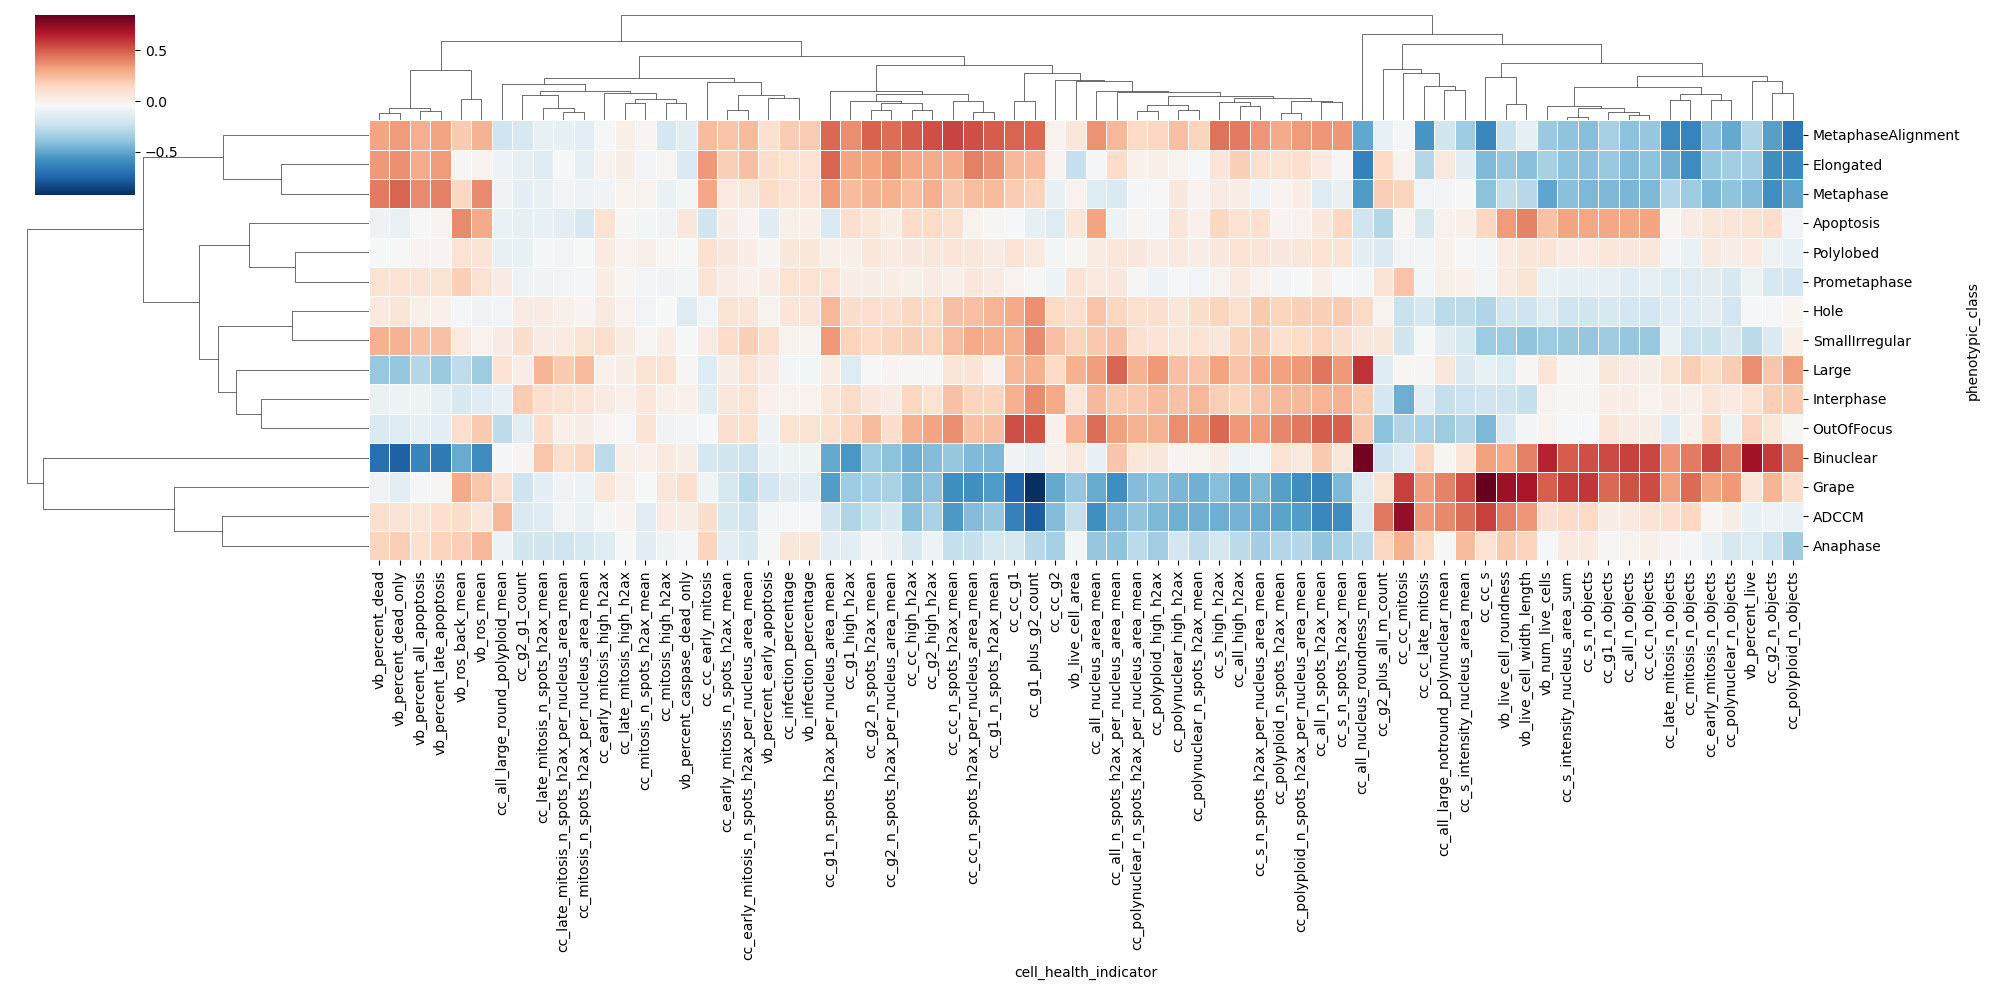

Showing correlation differences for: all, pearson, DP


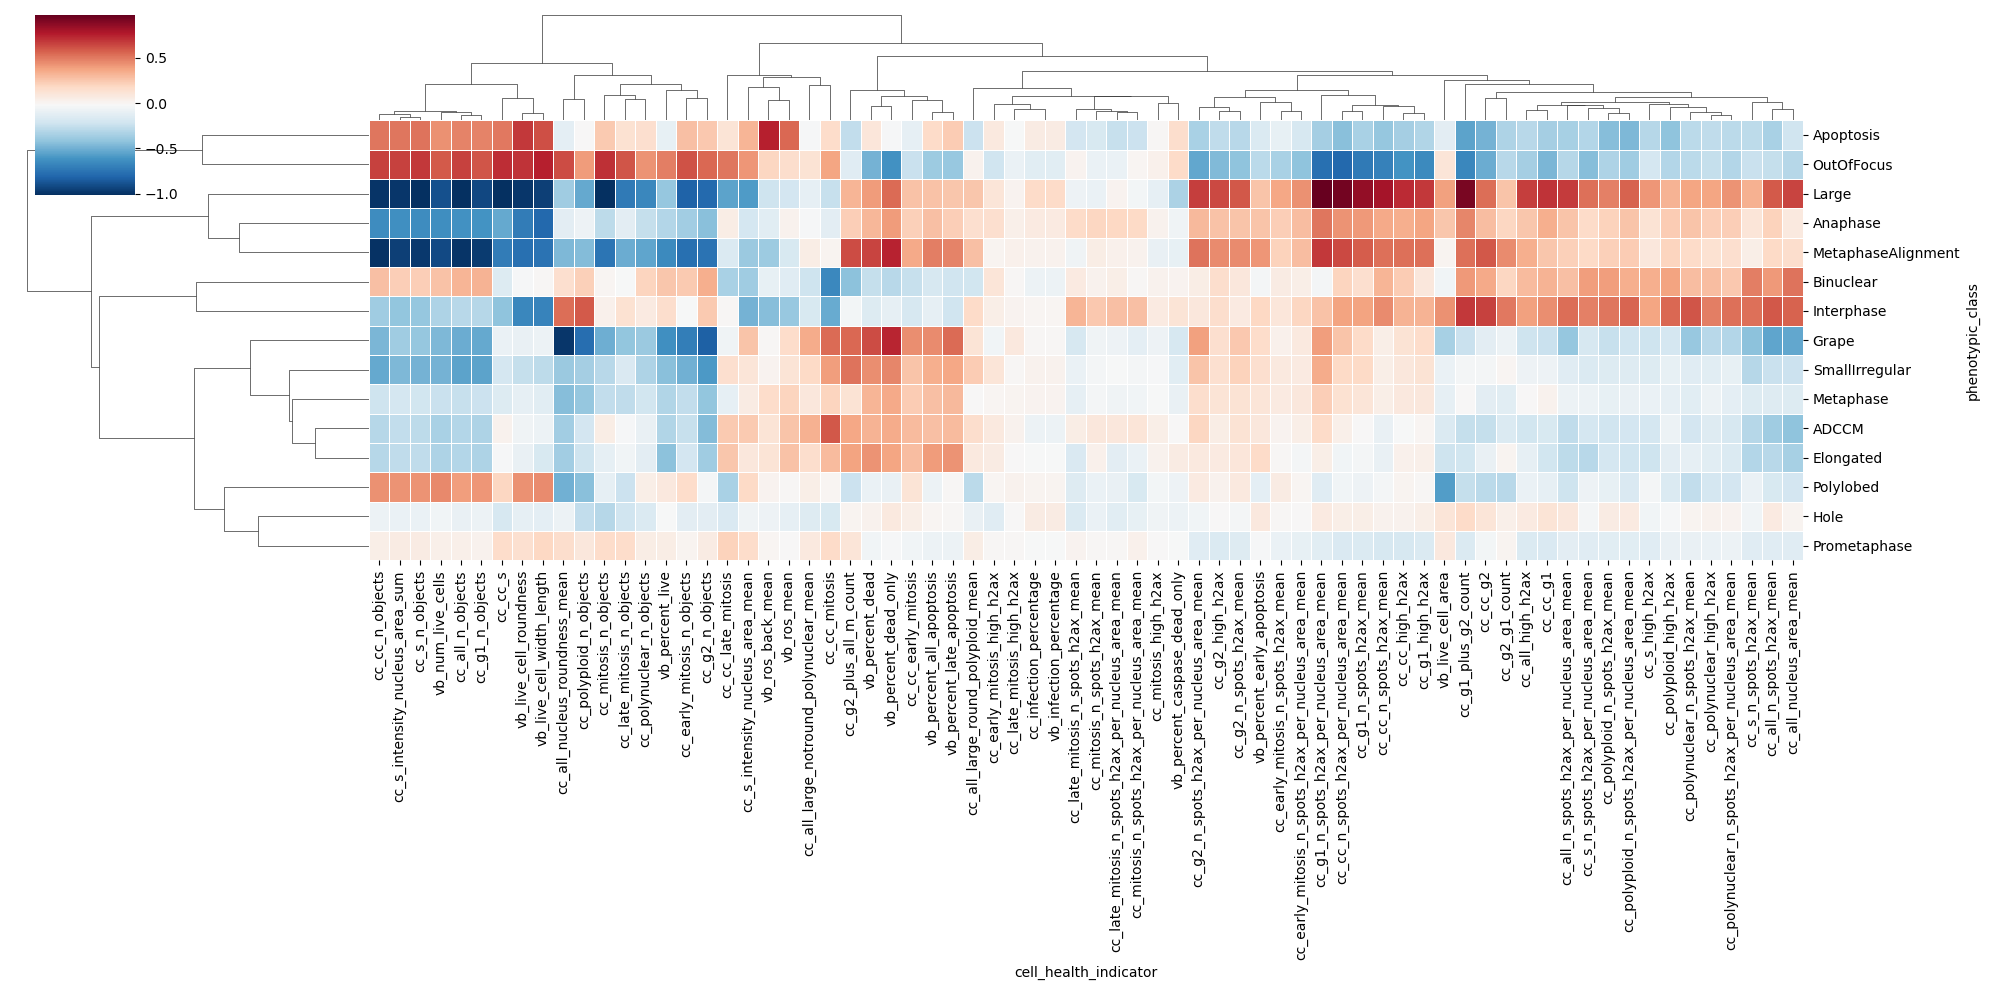

Showing correlation differences for: all, pearson, CP_and_DP


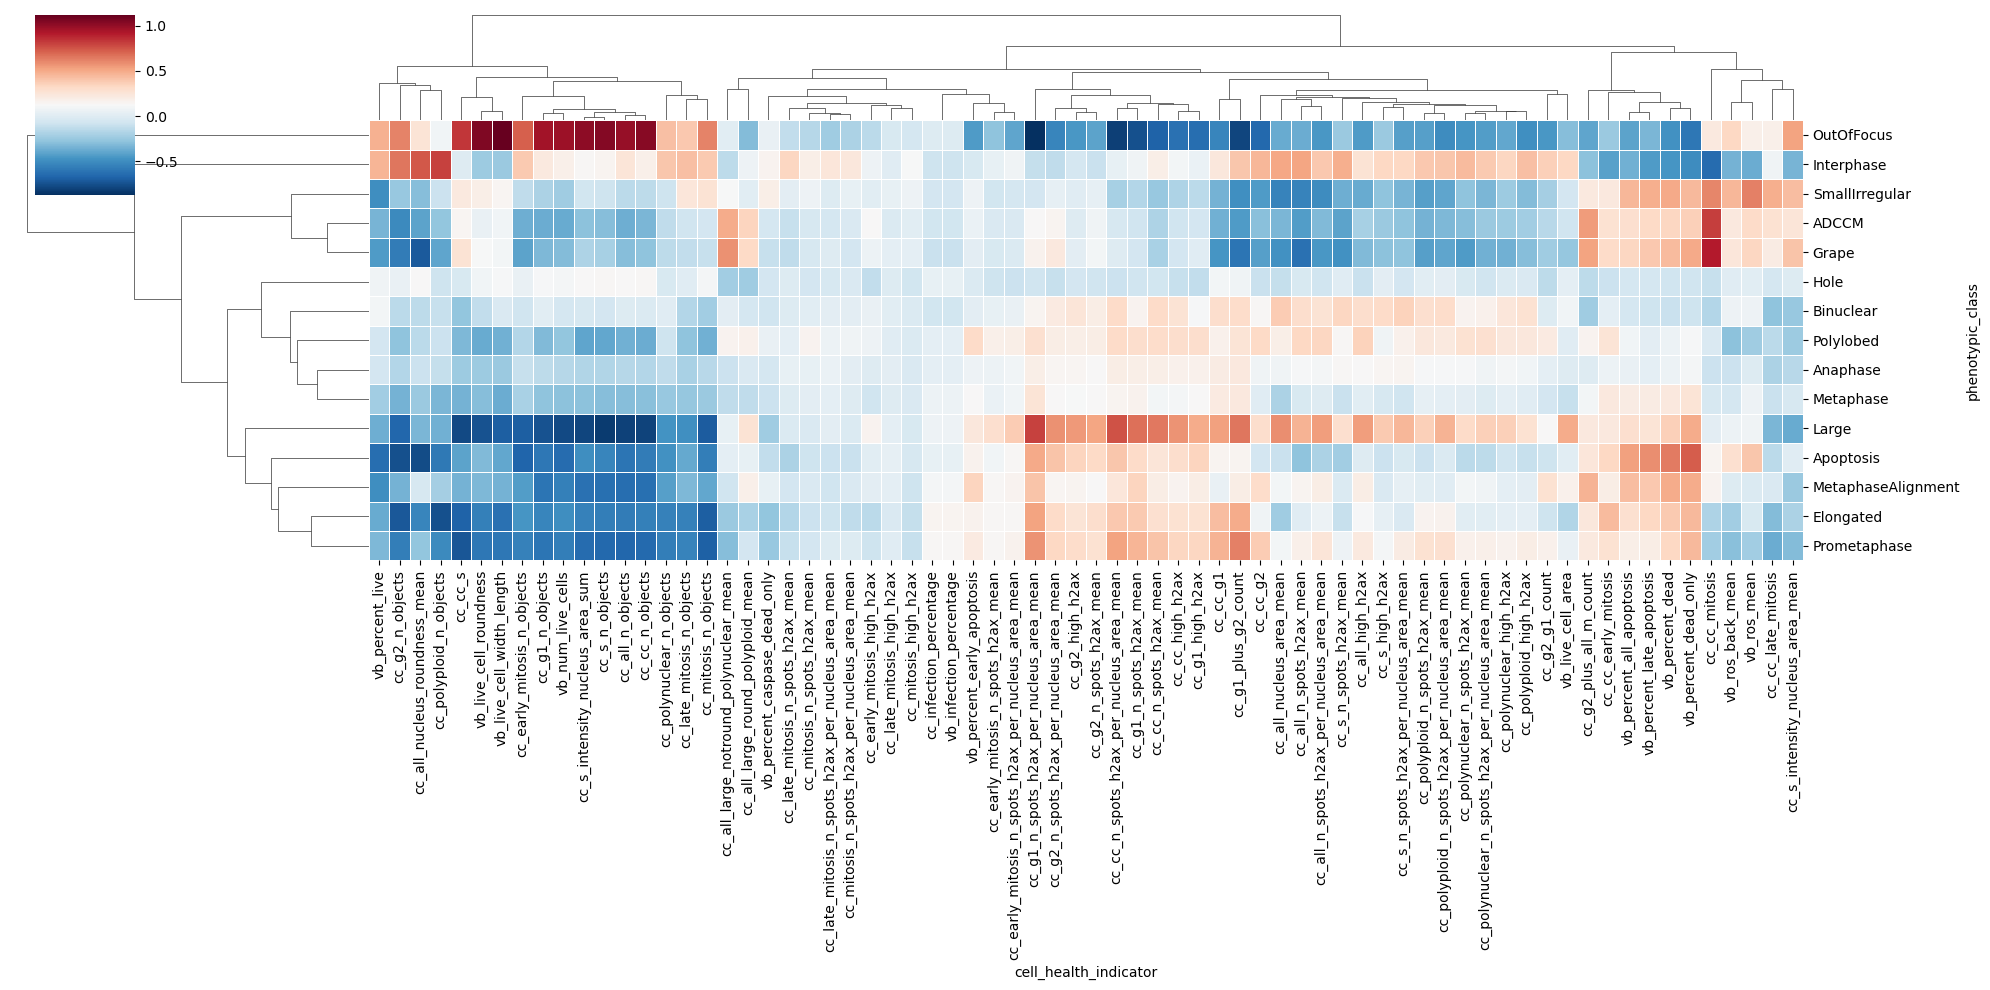

Showing correlation differences for: all, ccc, CP


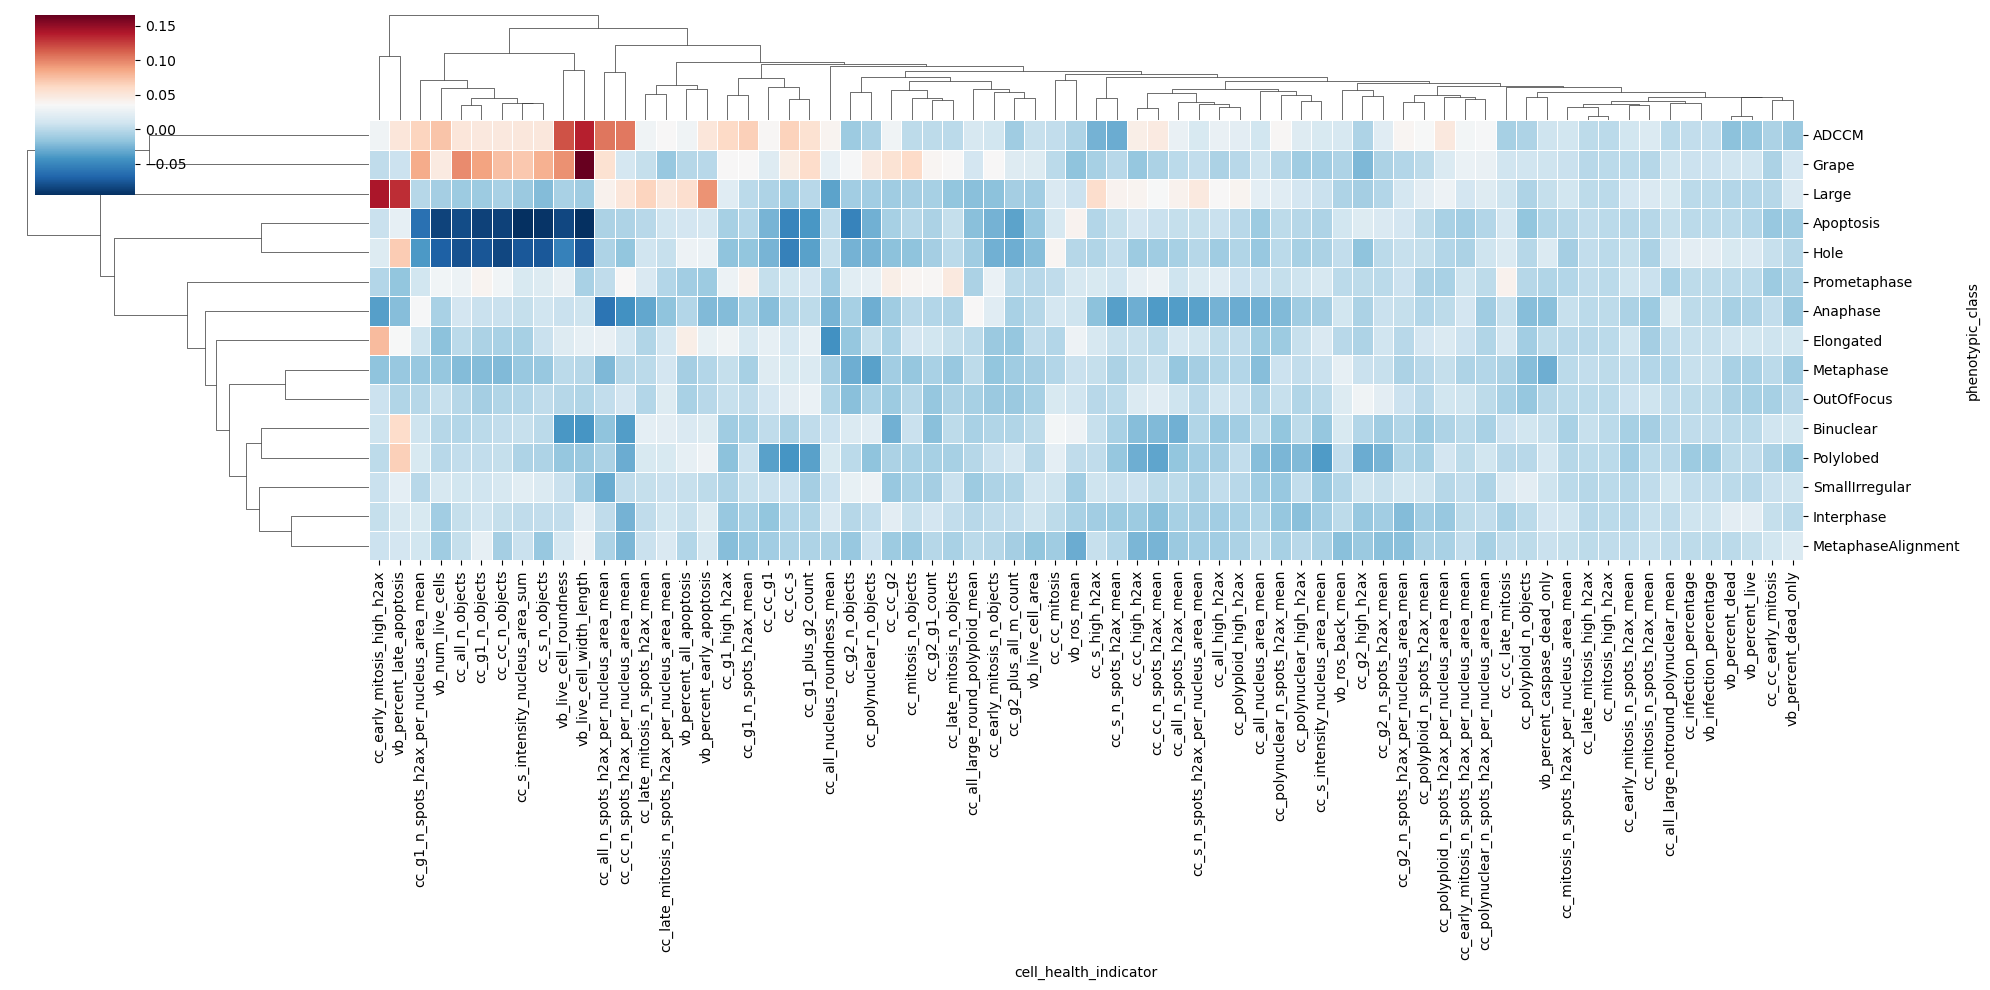

Showing correlation differences for: all, ccc, DP


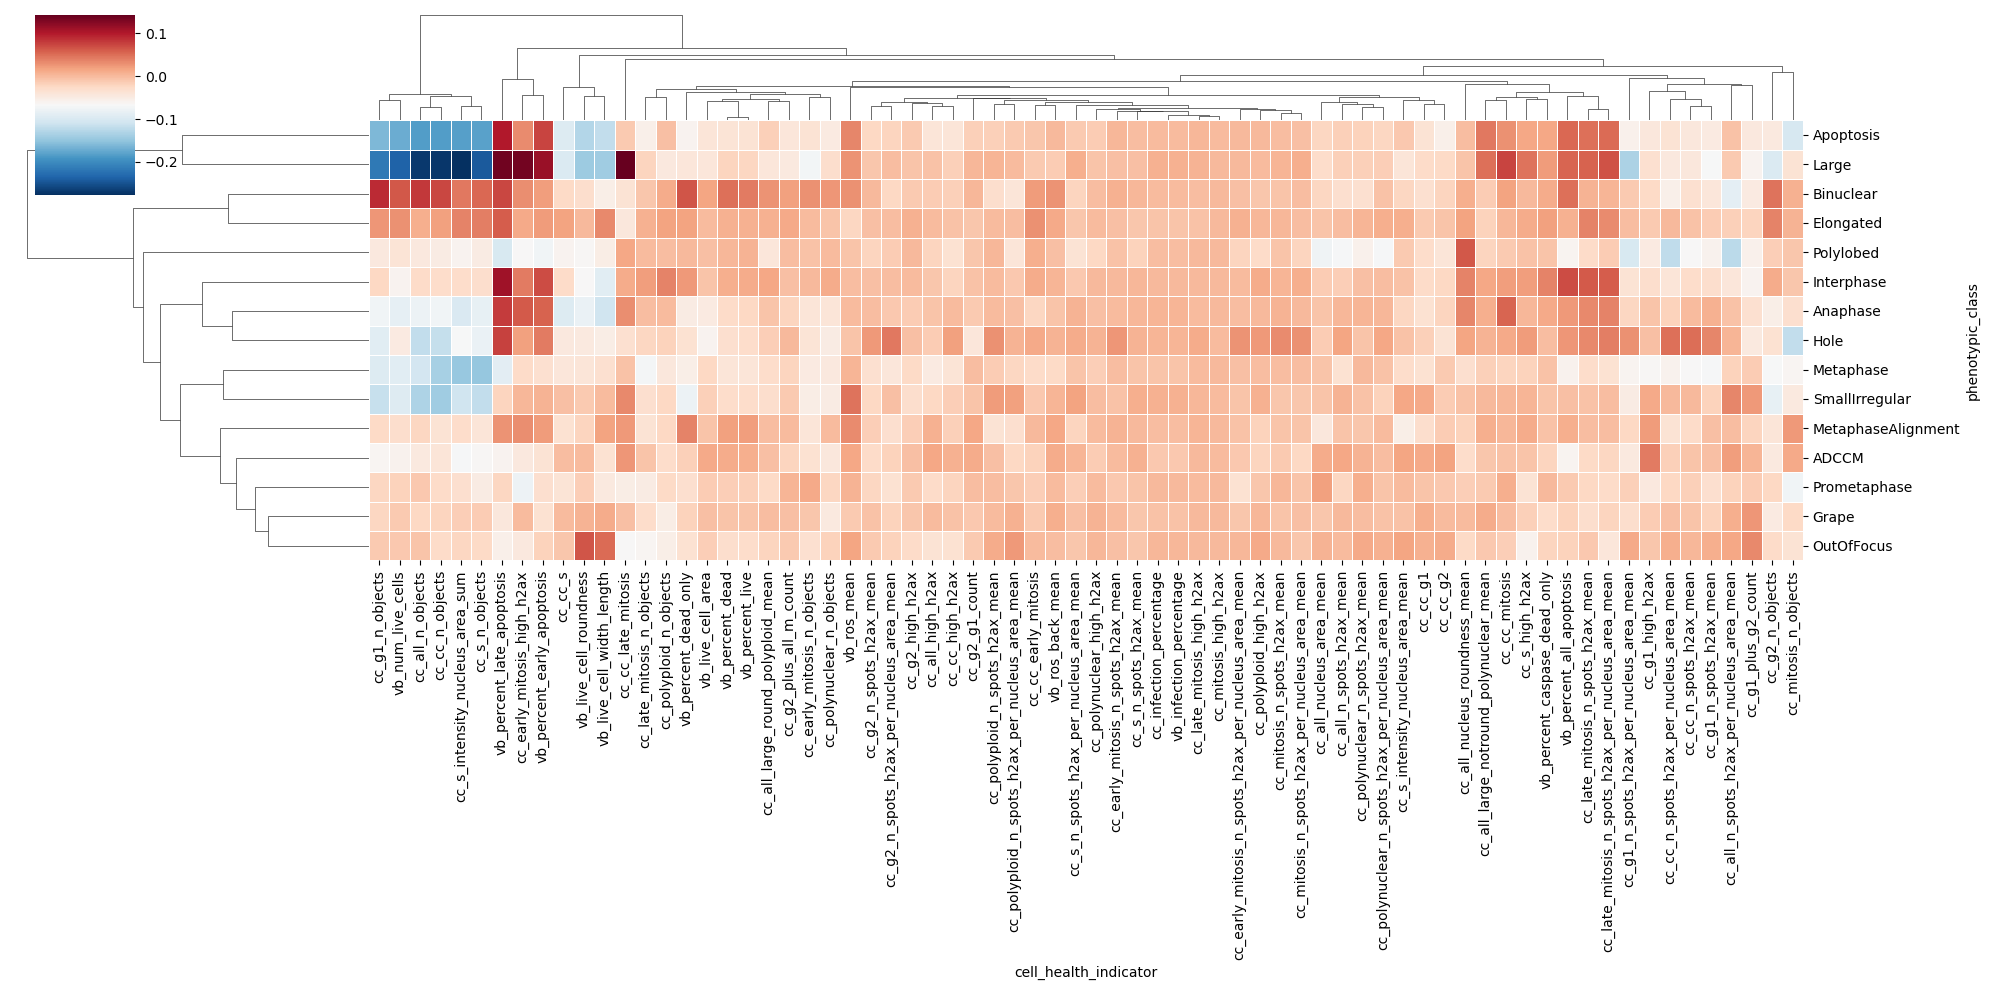

Showing correlation differences for: all, ccc, CP_and_DP


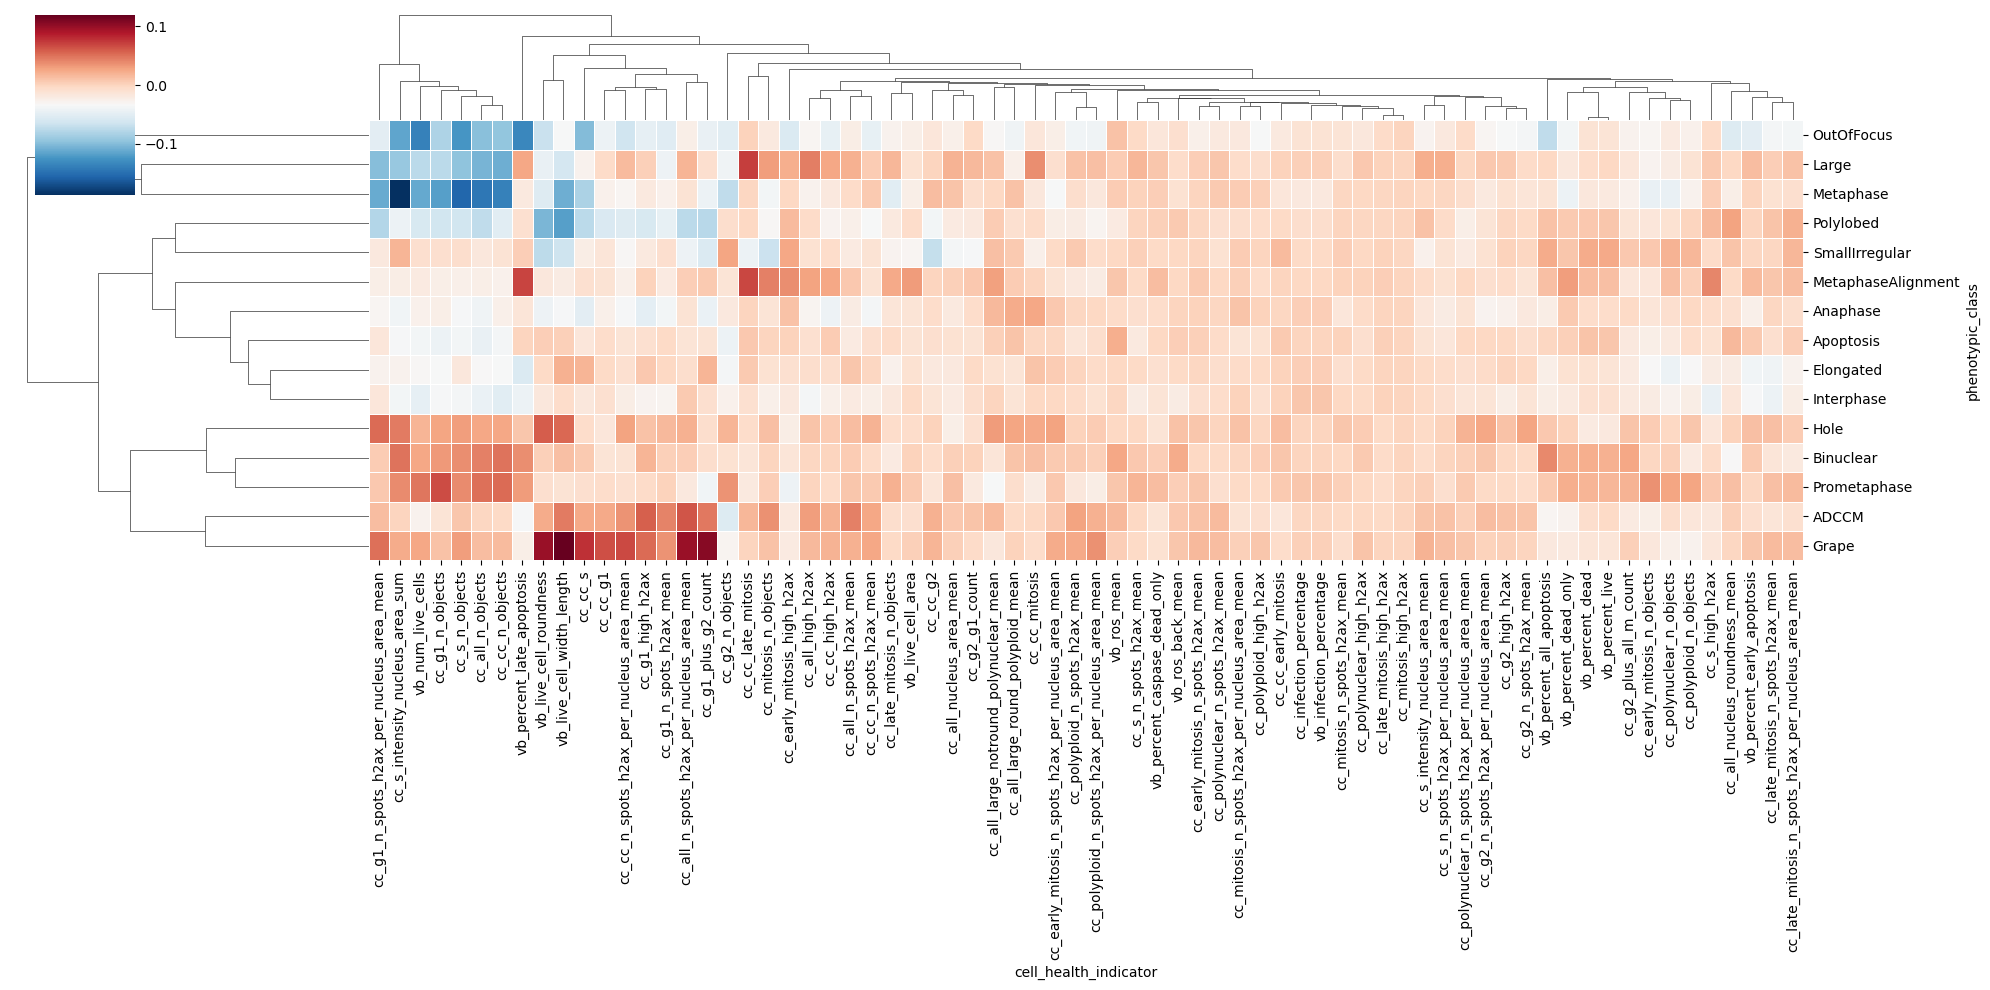

Showing correlation differences for: A549, pearson, CP


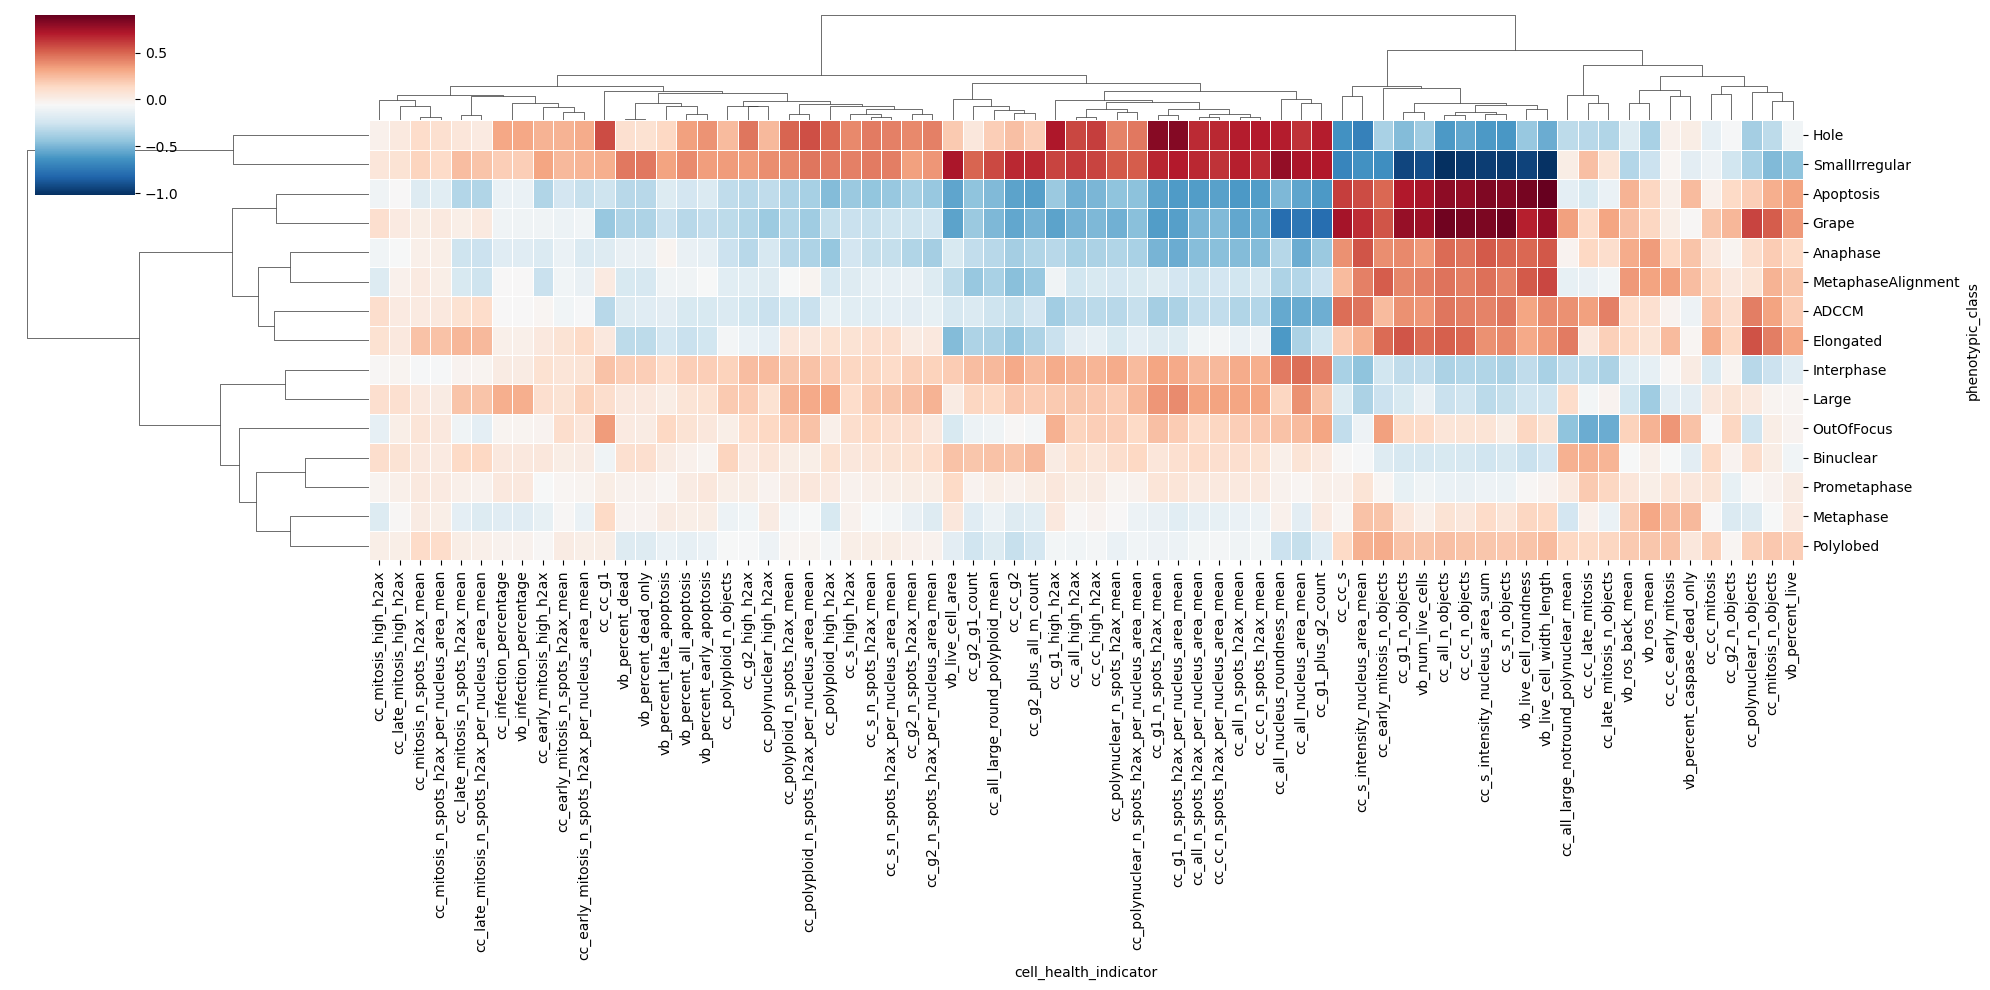

Showing correlation differences for: A549, pearson, DP


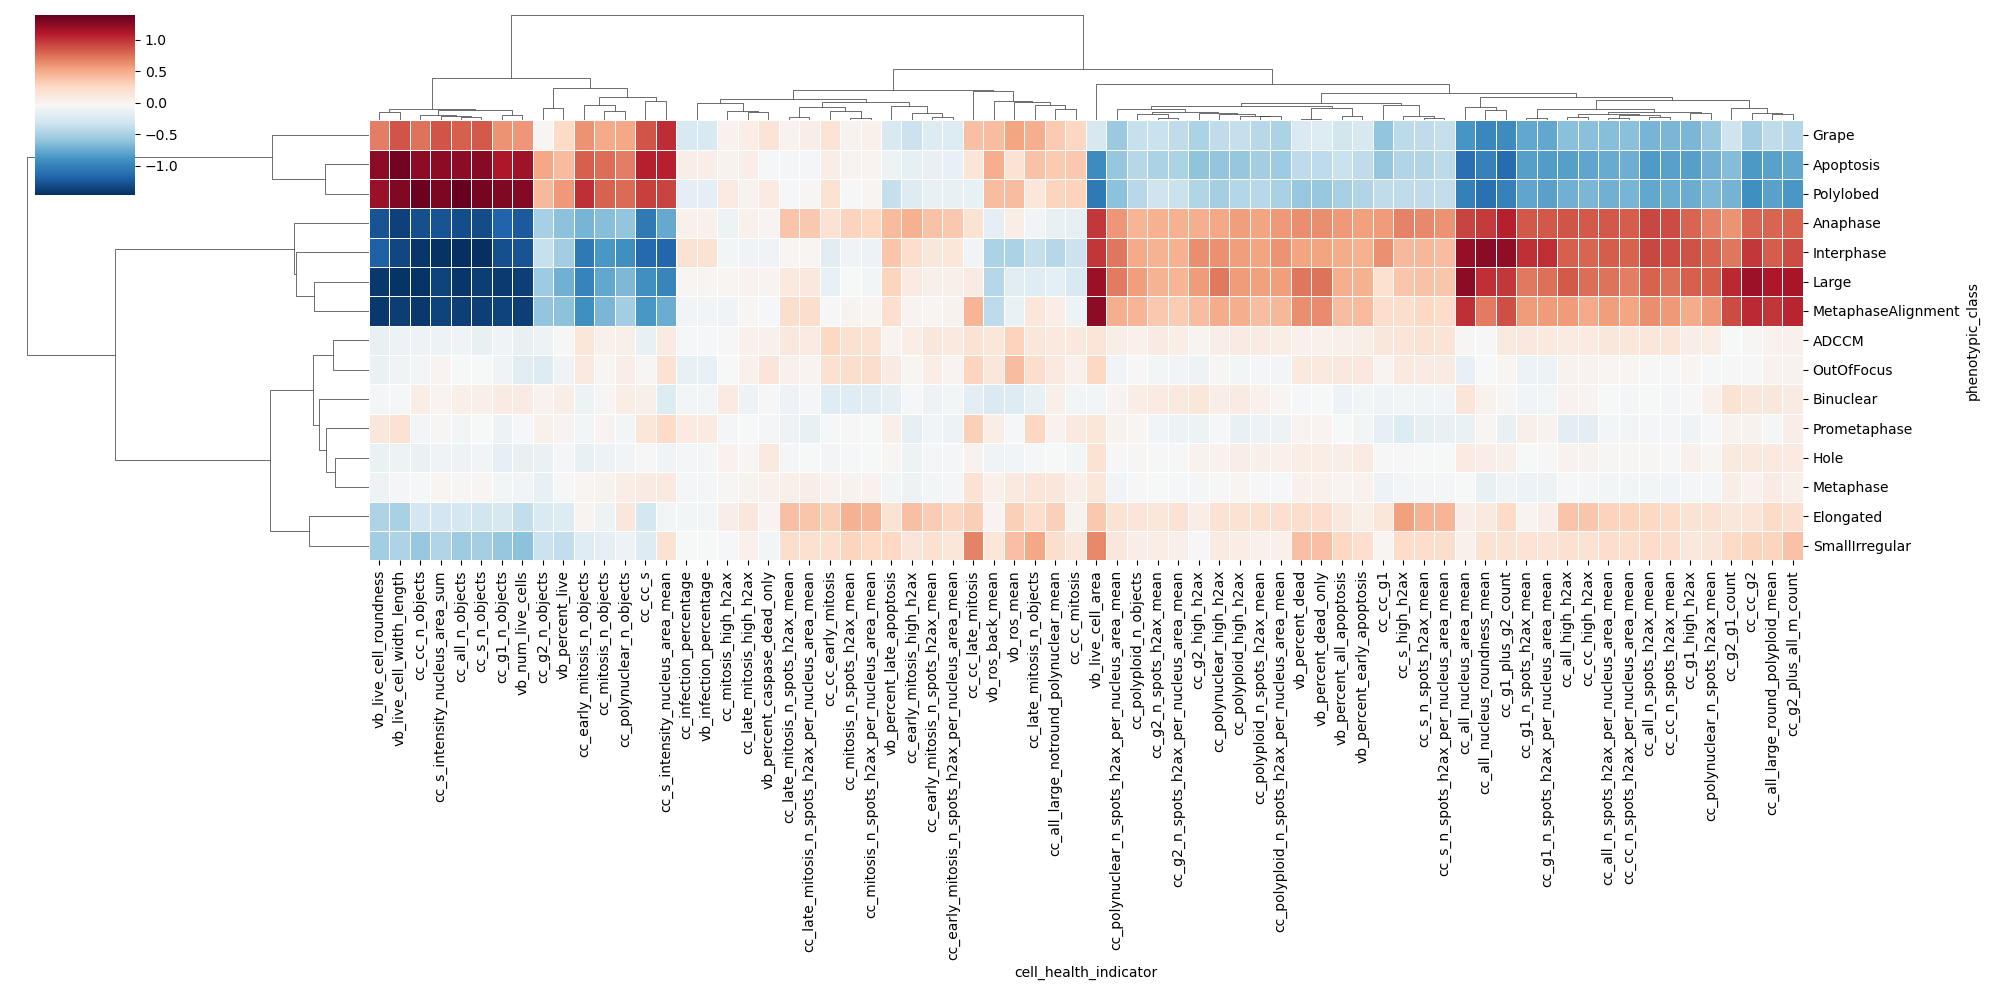

Showing correlation differences for: A549, pearson, CP_and_DP


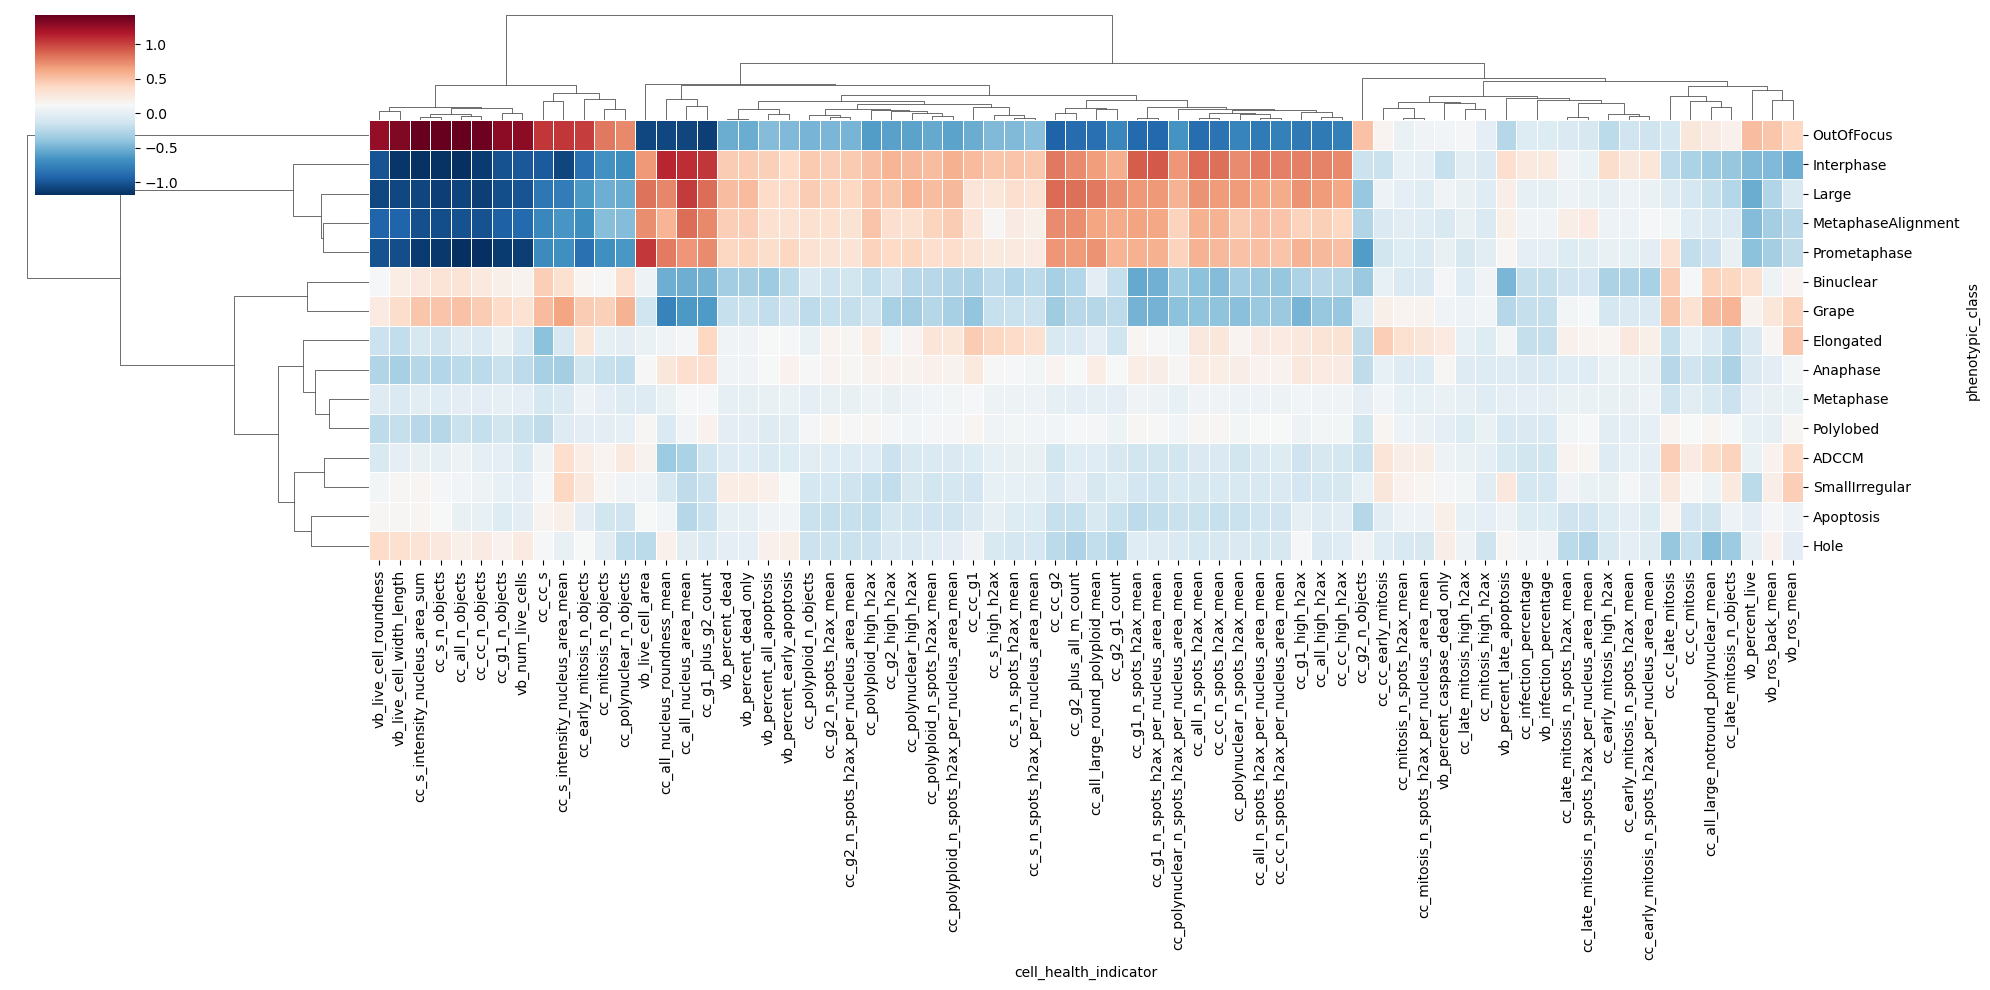

Showing correlation differences for: A549, ccc, CP


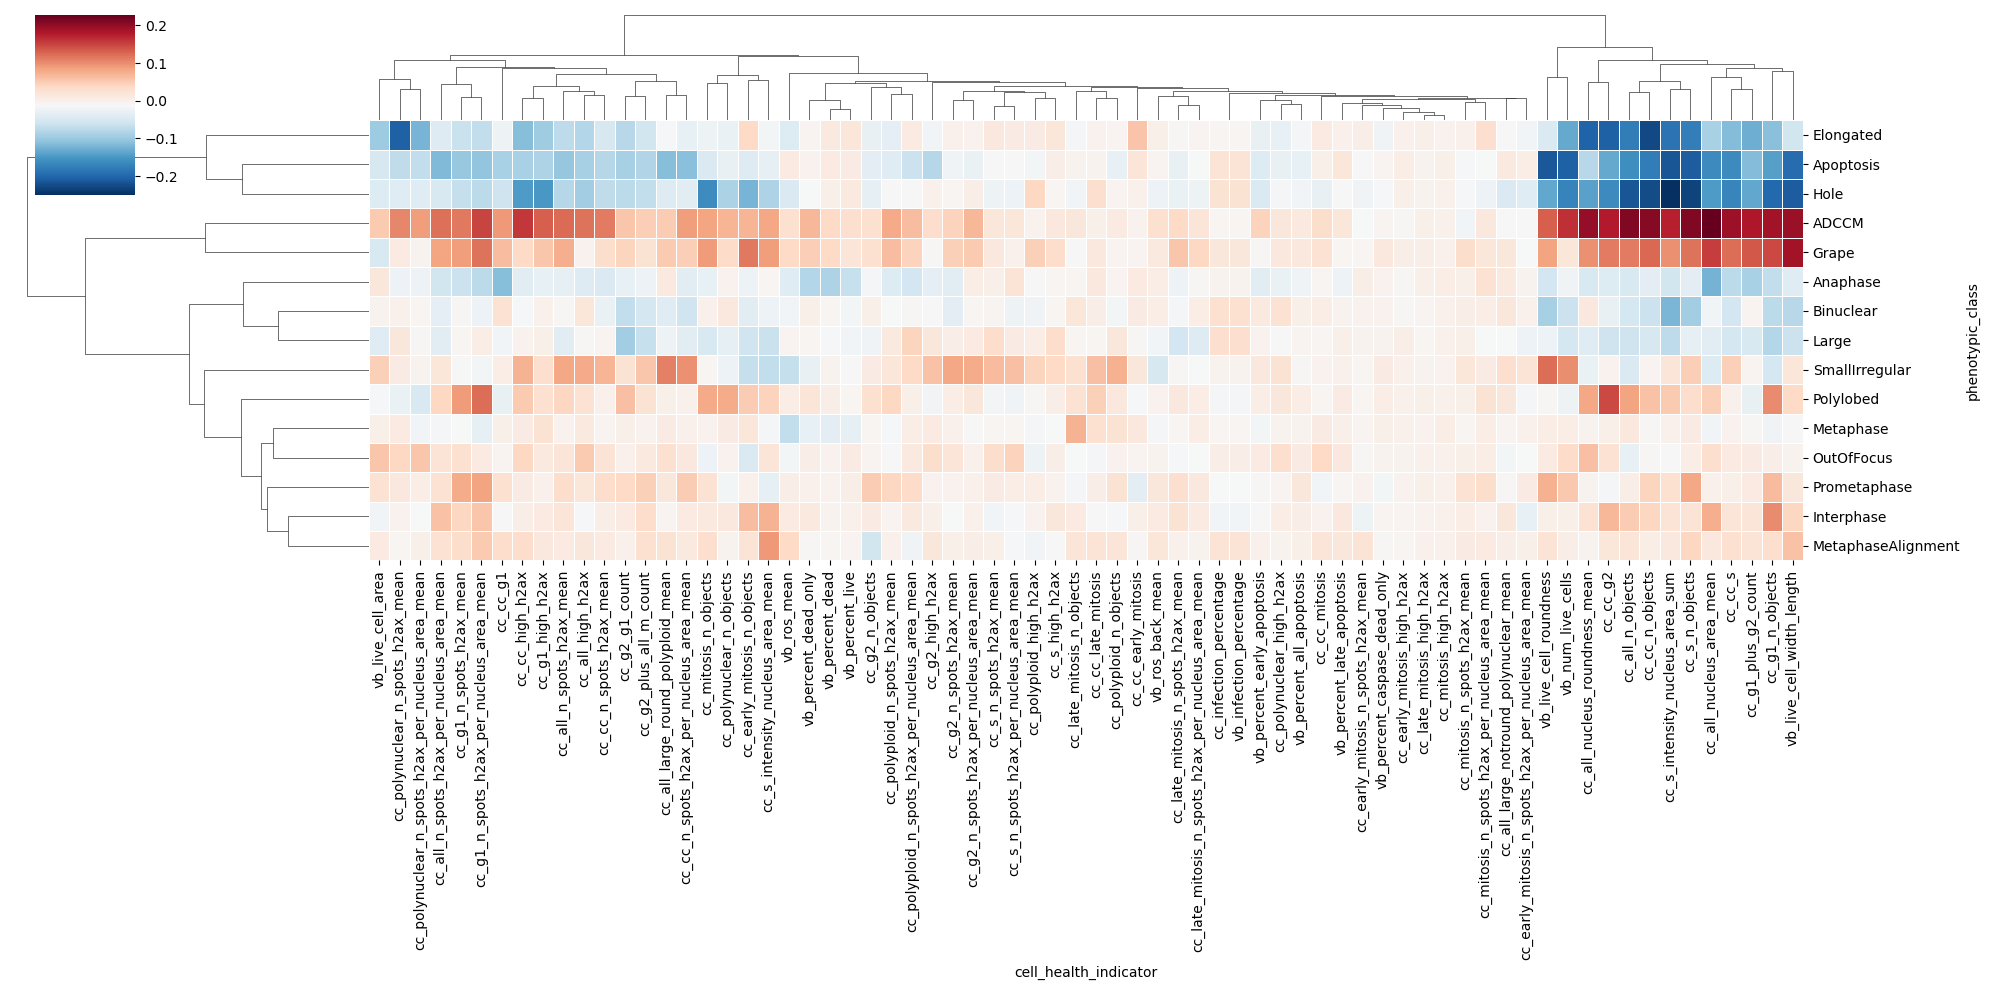

Showing correlation differences for: A549, ccc, DP


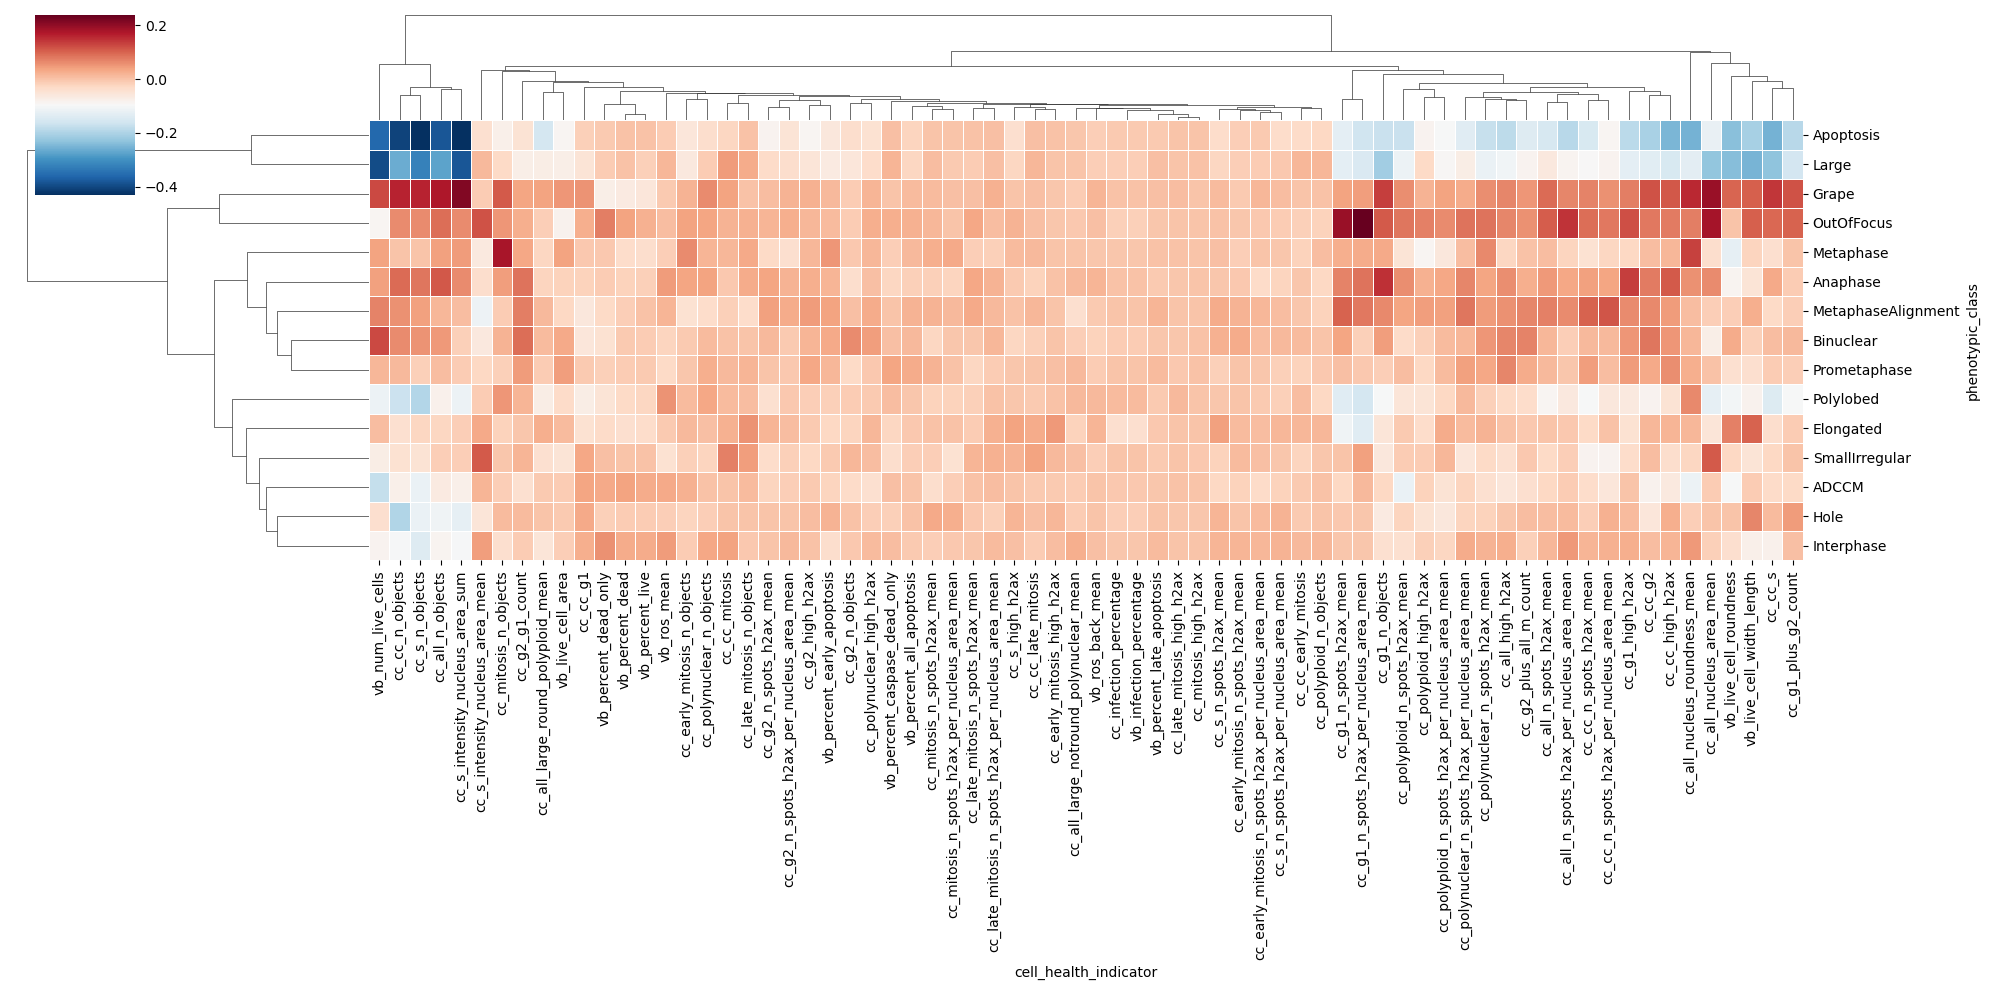

Showing correlation differences for: A549, ccc, CP_and_DP


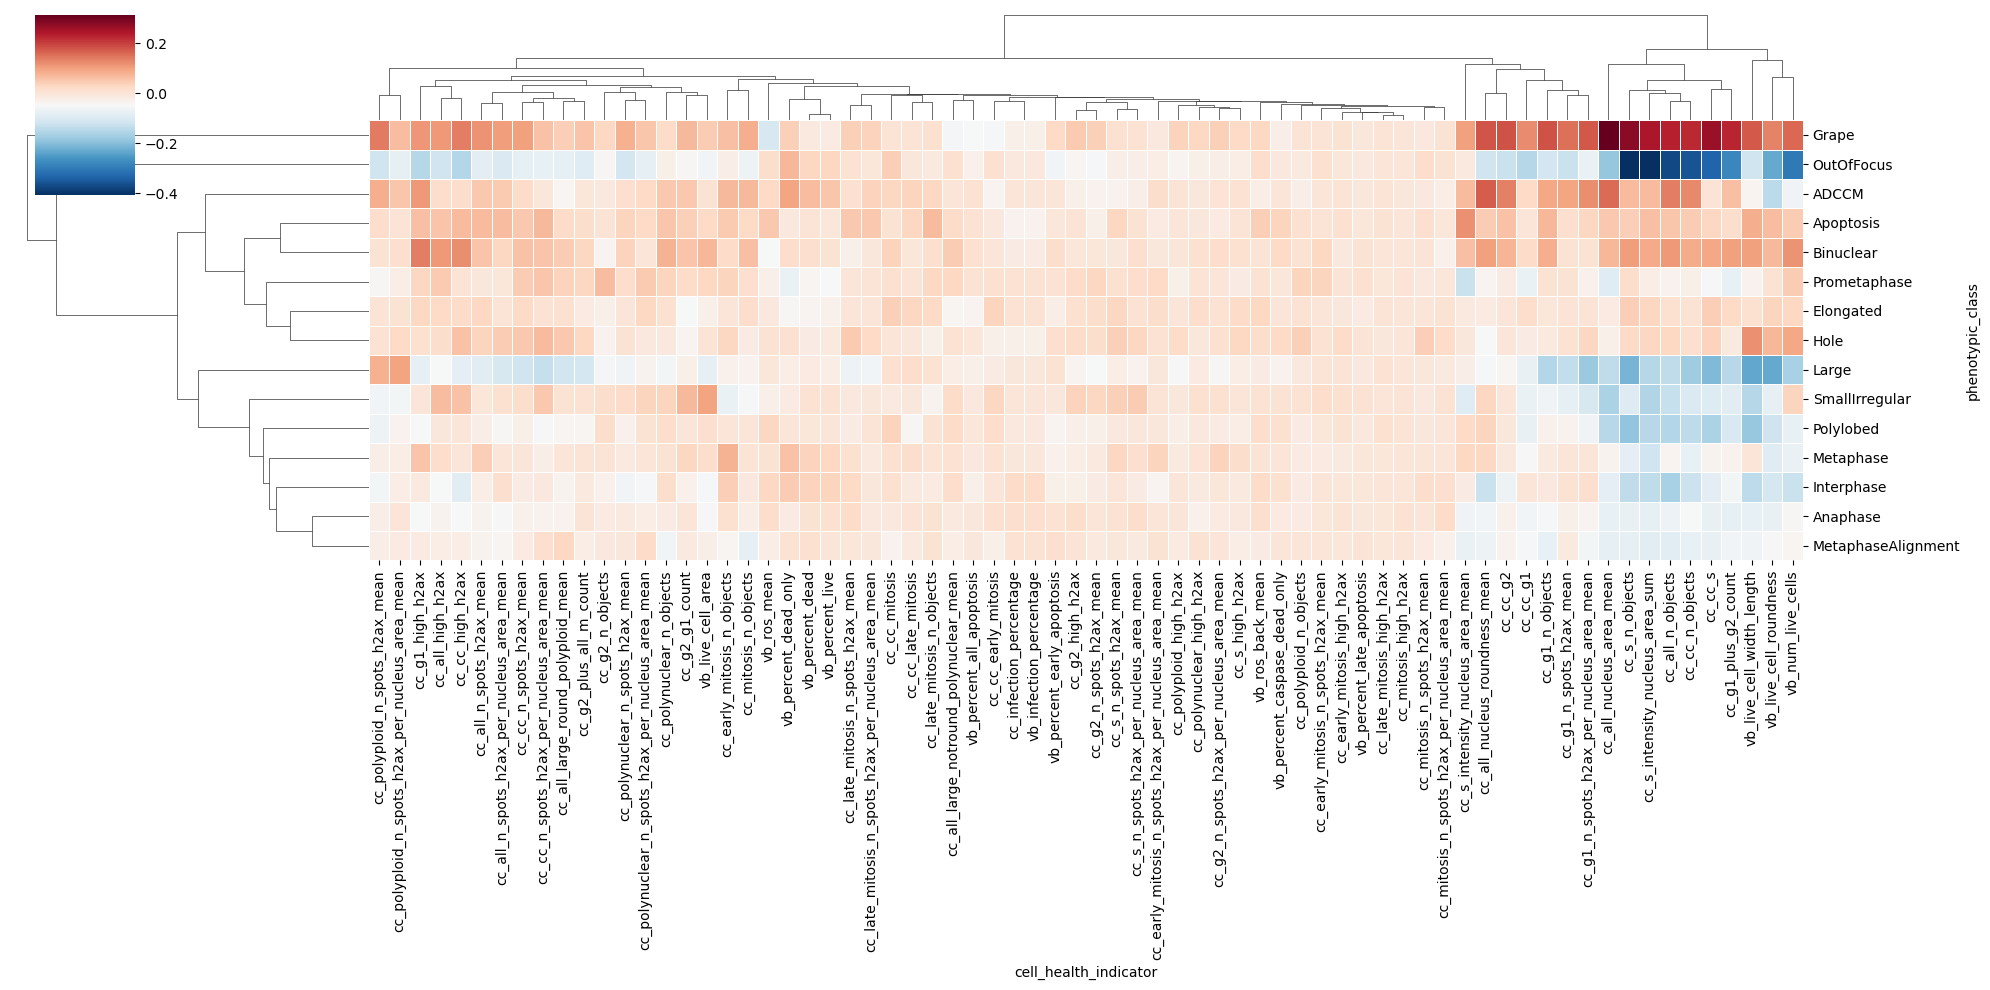

Showing correlation differences for: ES2, pearson, CP


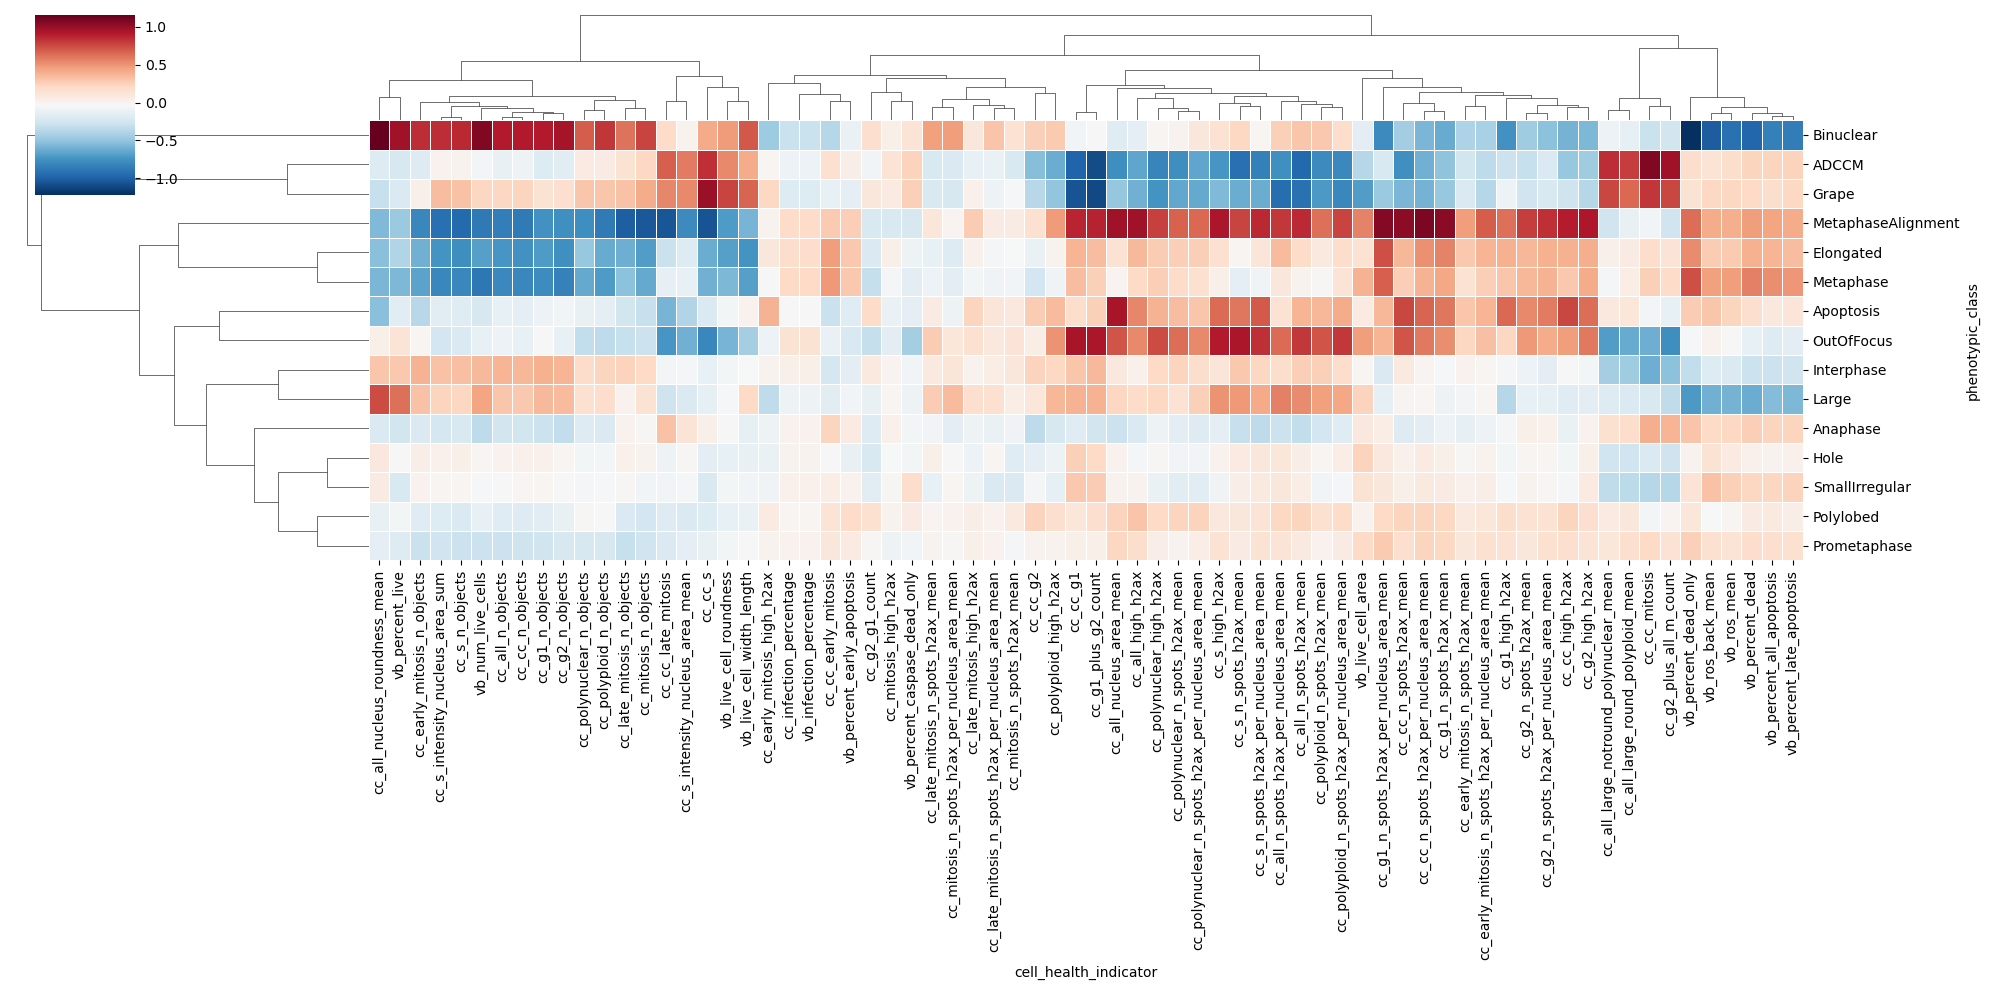

Showing correlation differences for: ES2, pearson, DP


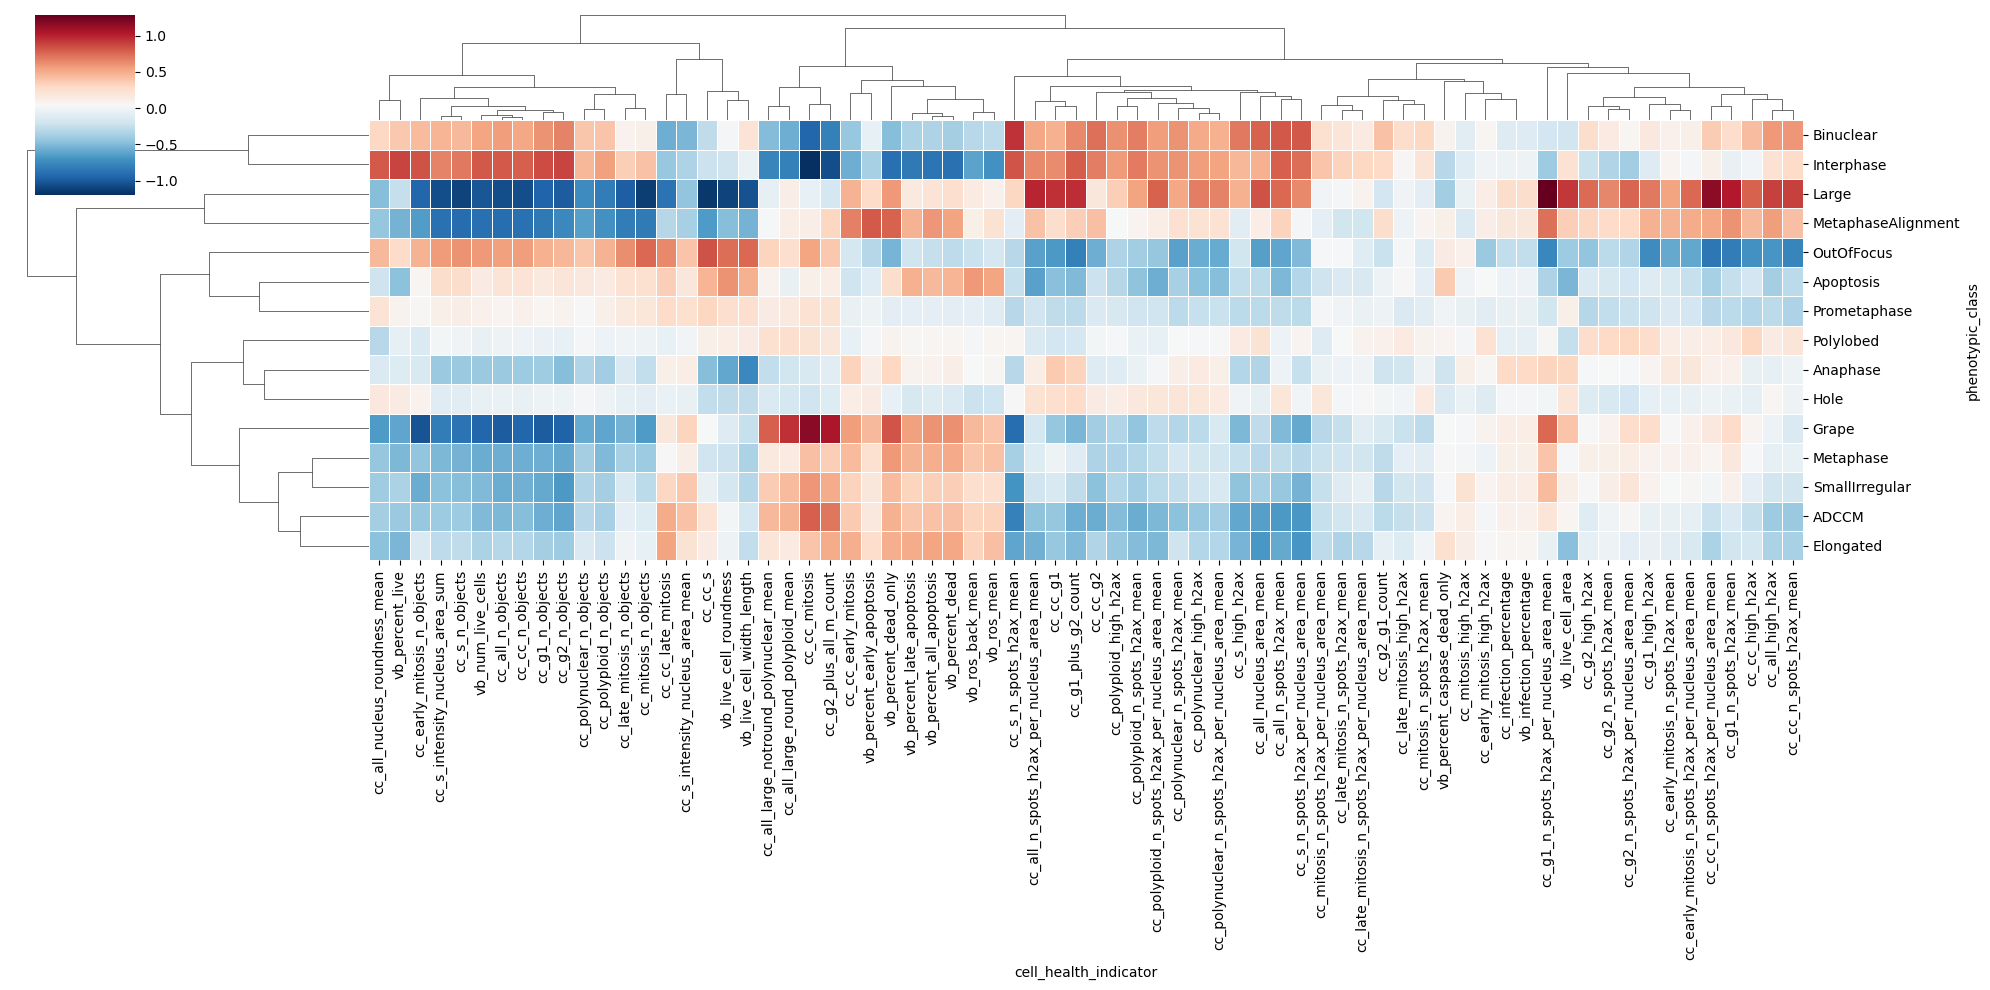

Showing correlation differences for: ES2, pearson, CP_and_DP


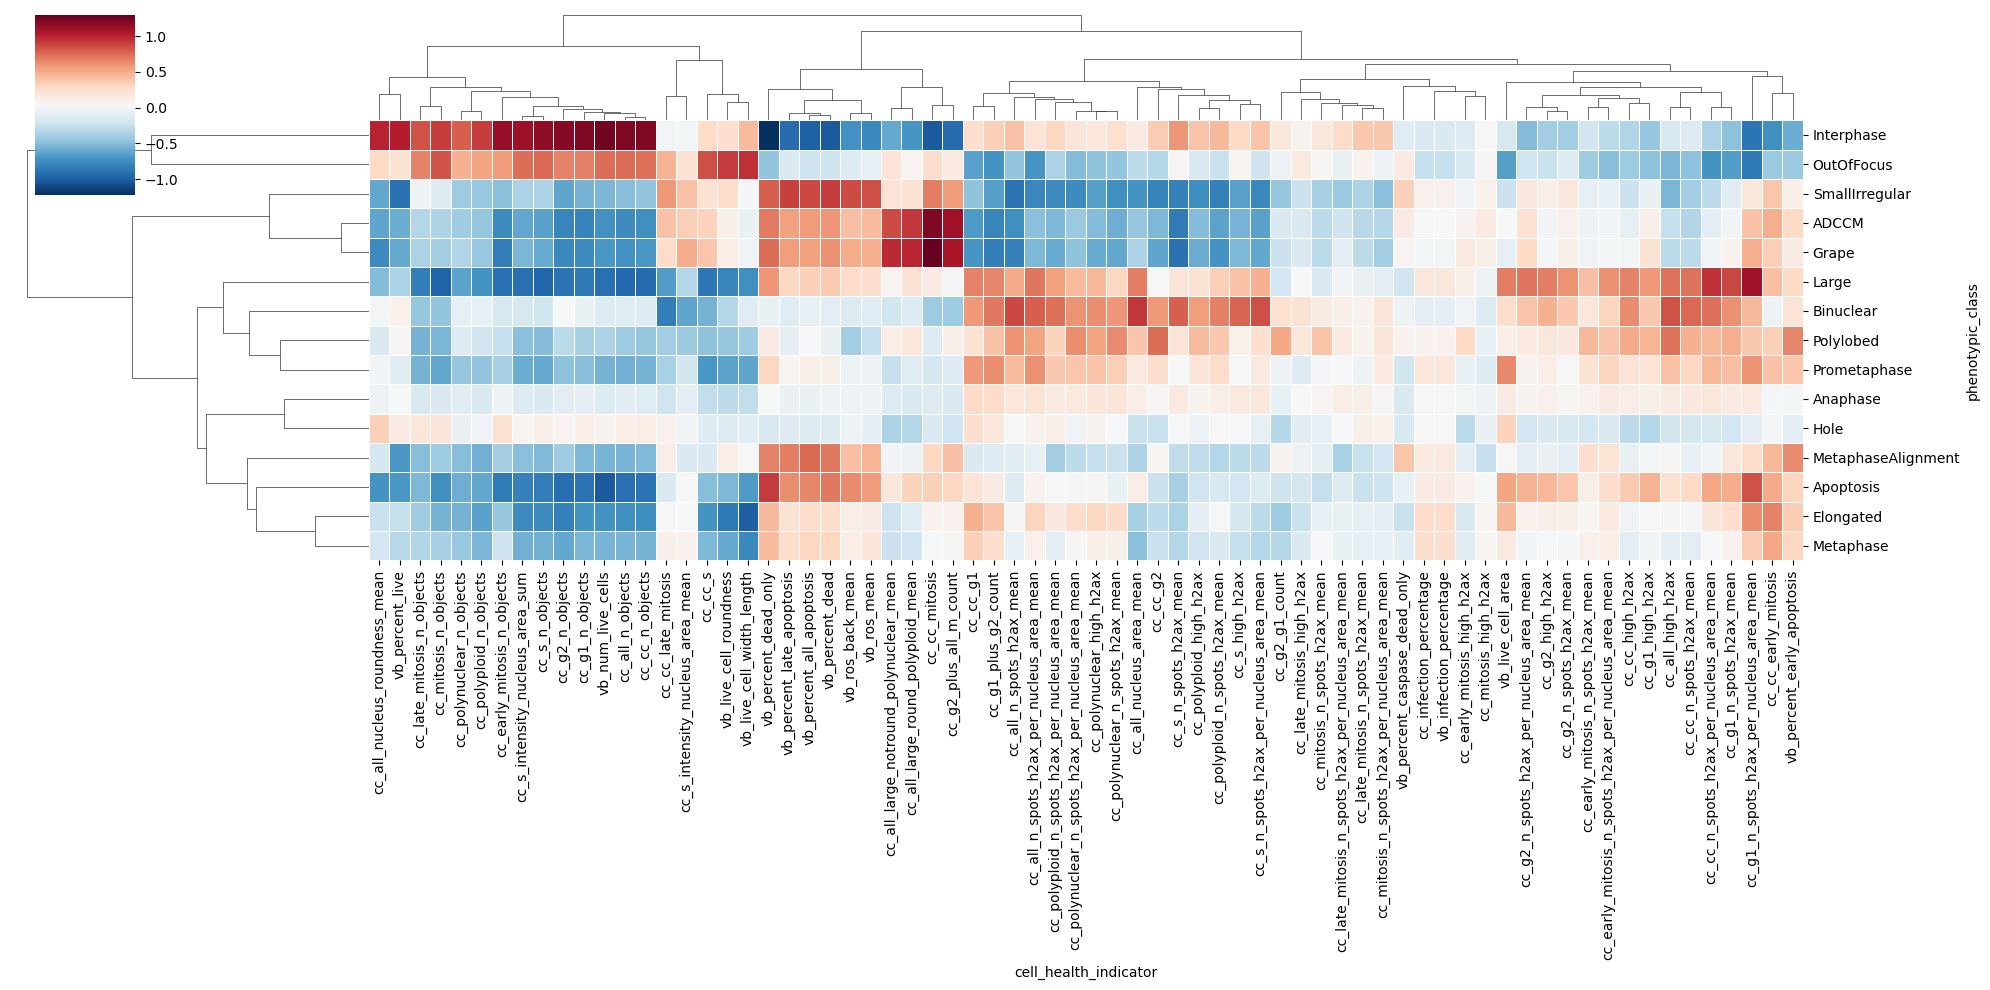

Showing correlation differences for: ES2, ccc, CP


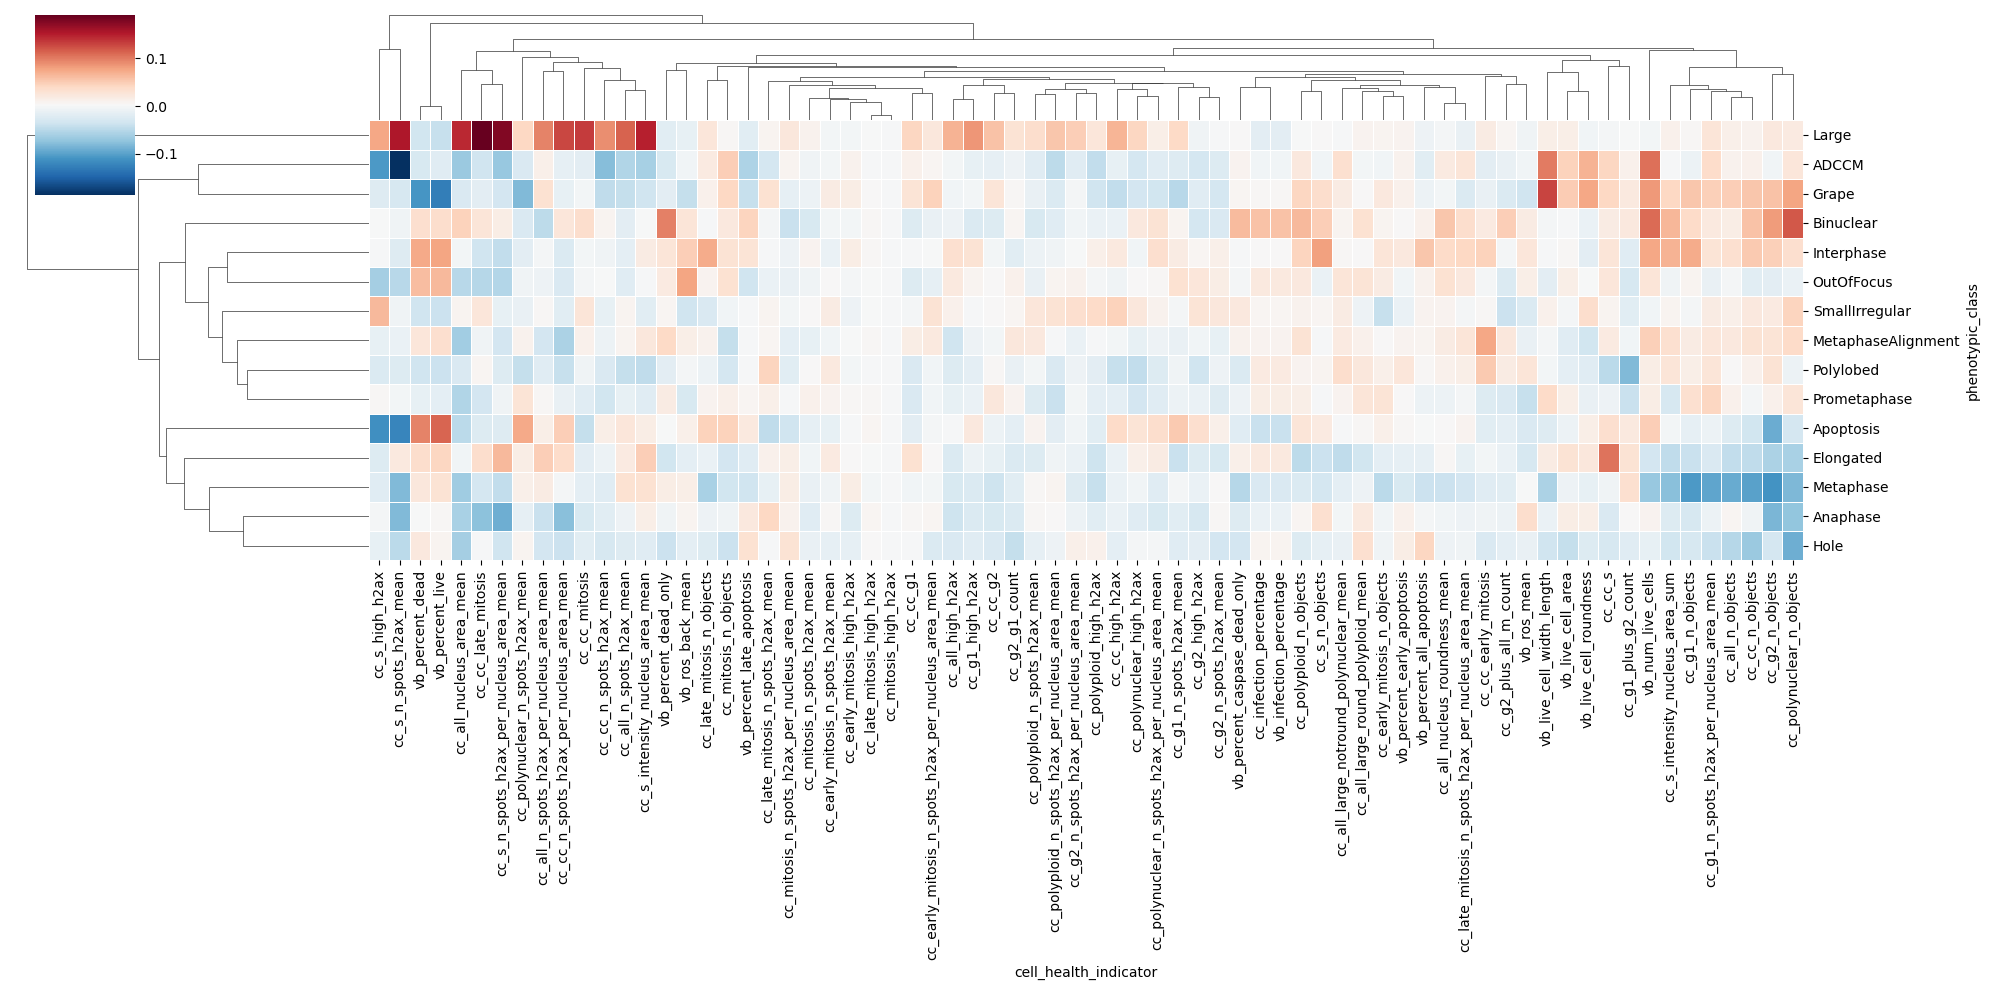

Showing correlation differences for: ES2, ccc, DP


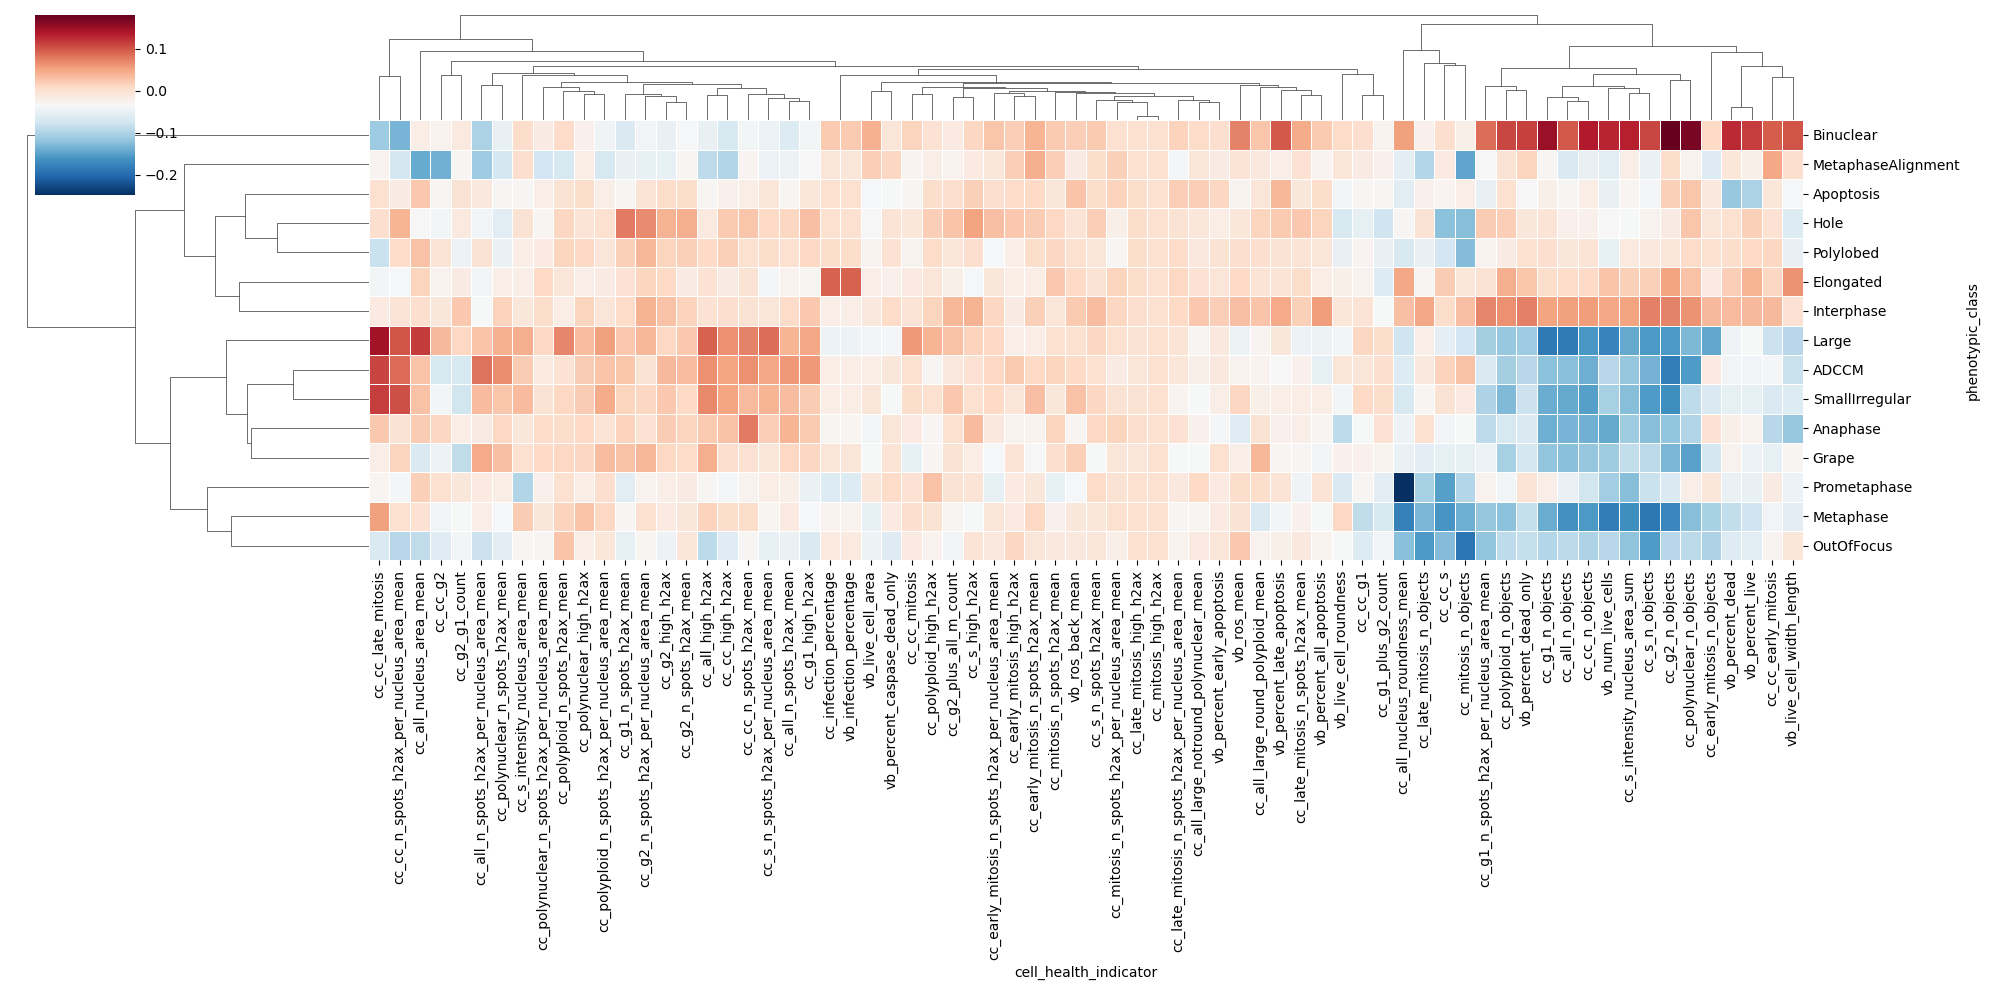

Showing correlation differences for: ES2, ccc, CP_and_DP


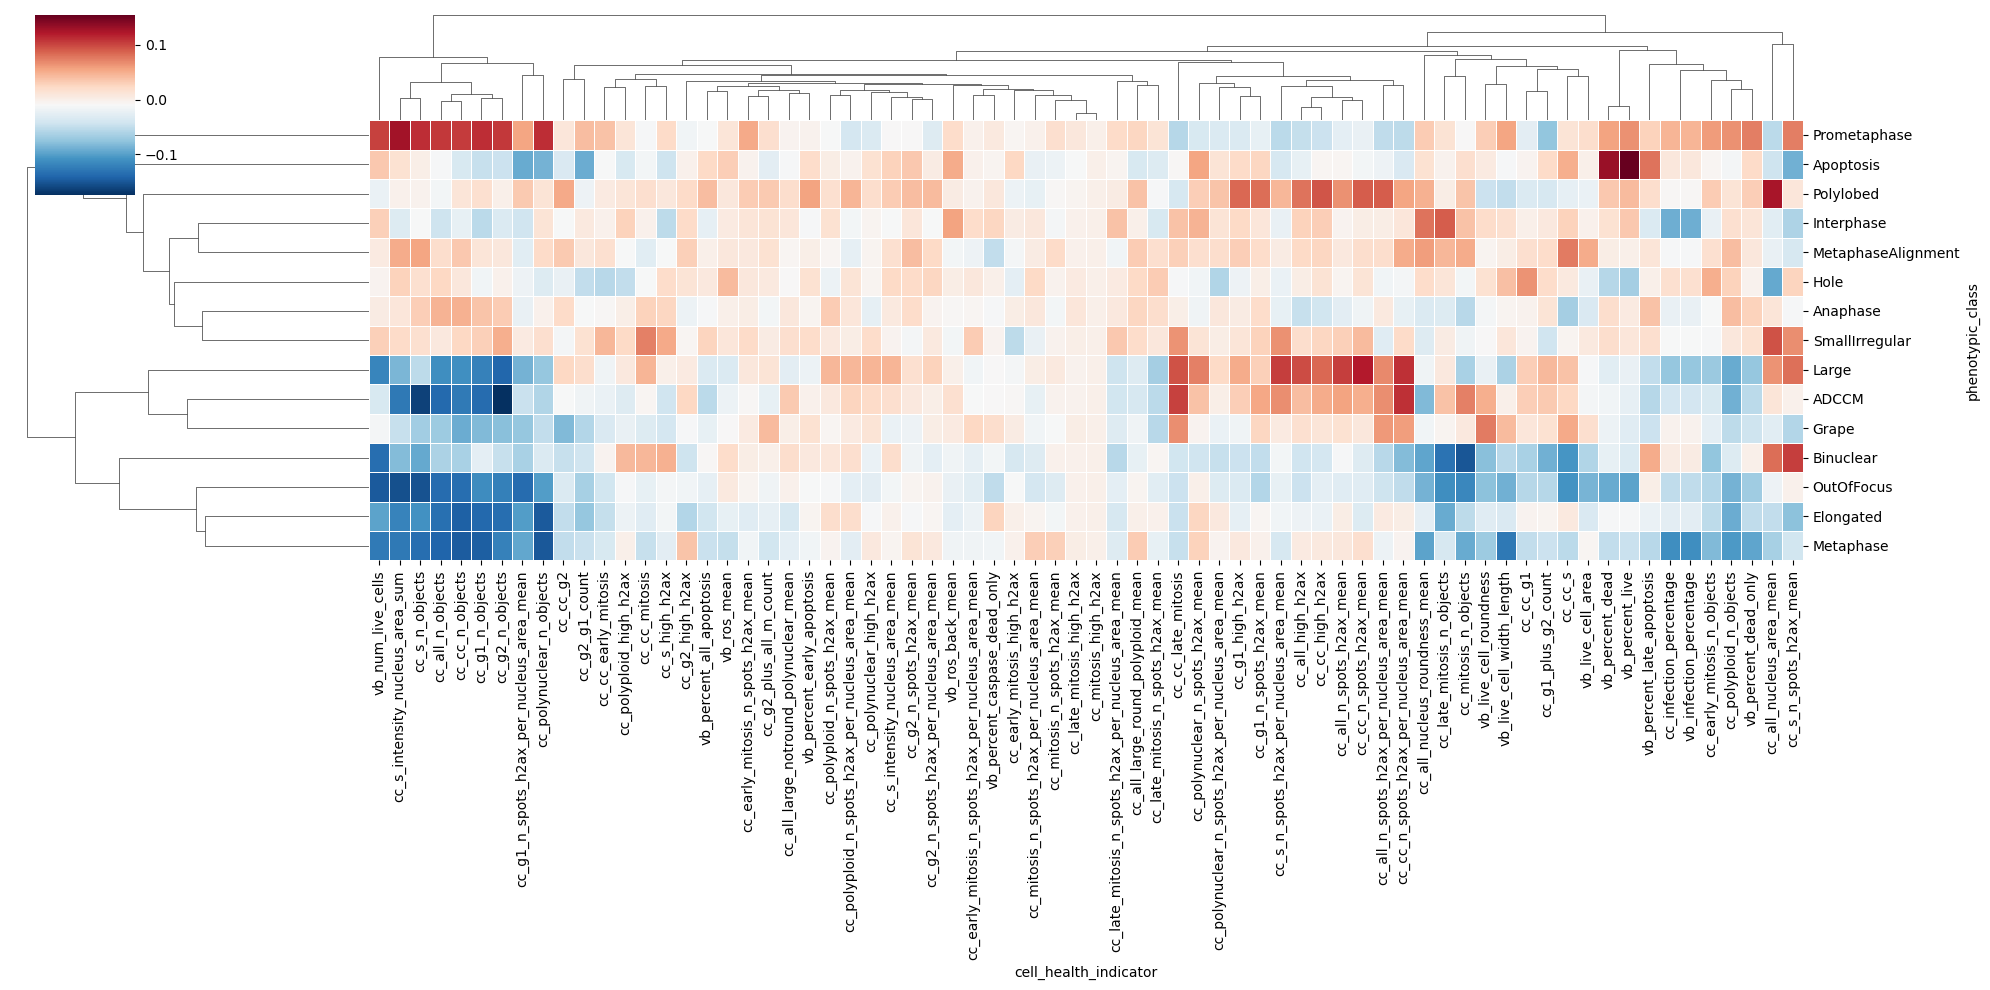

Showing correlation differences for: HCC44, pearson, CP


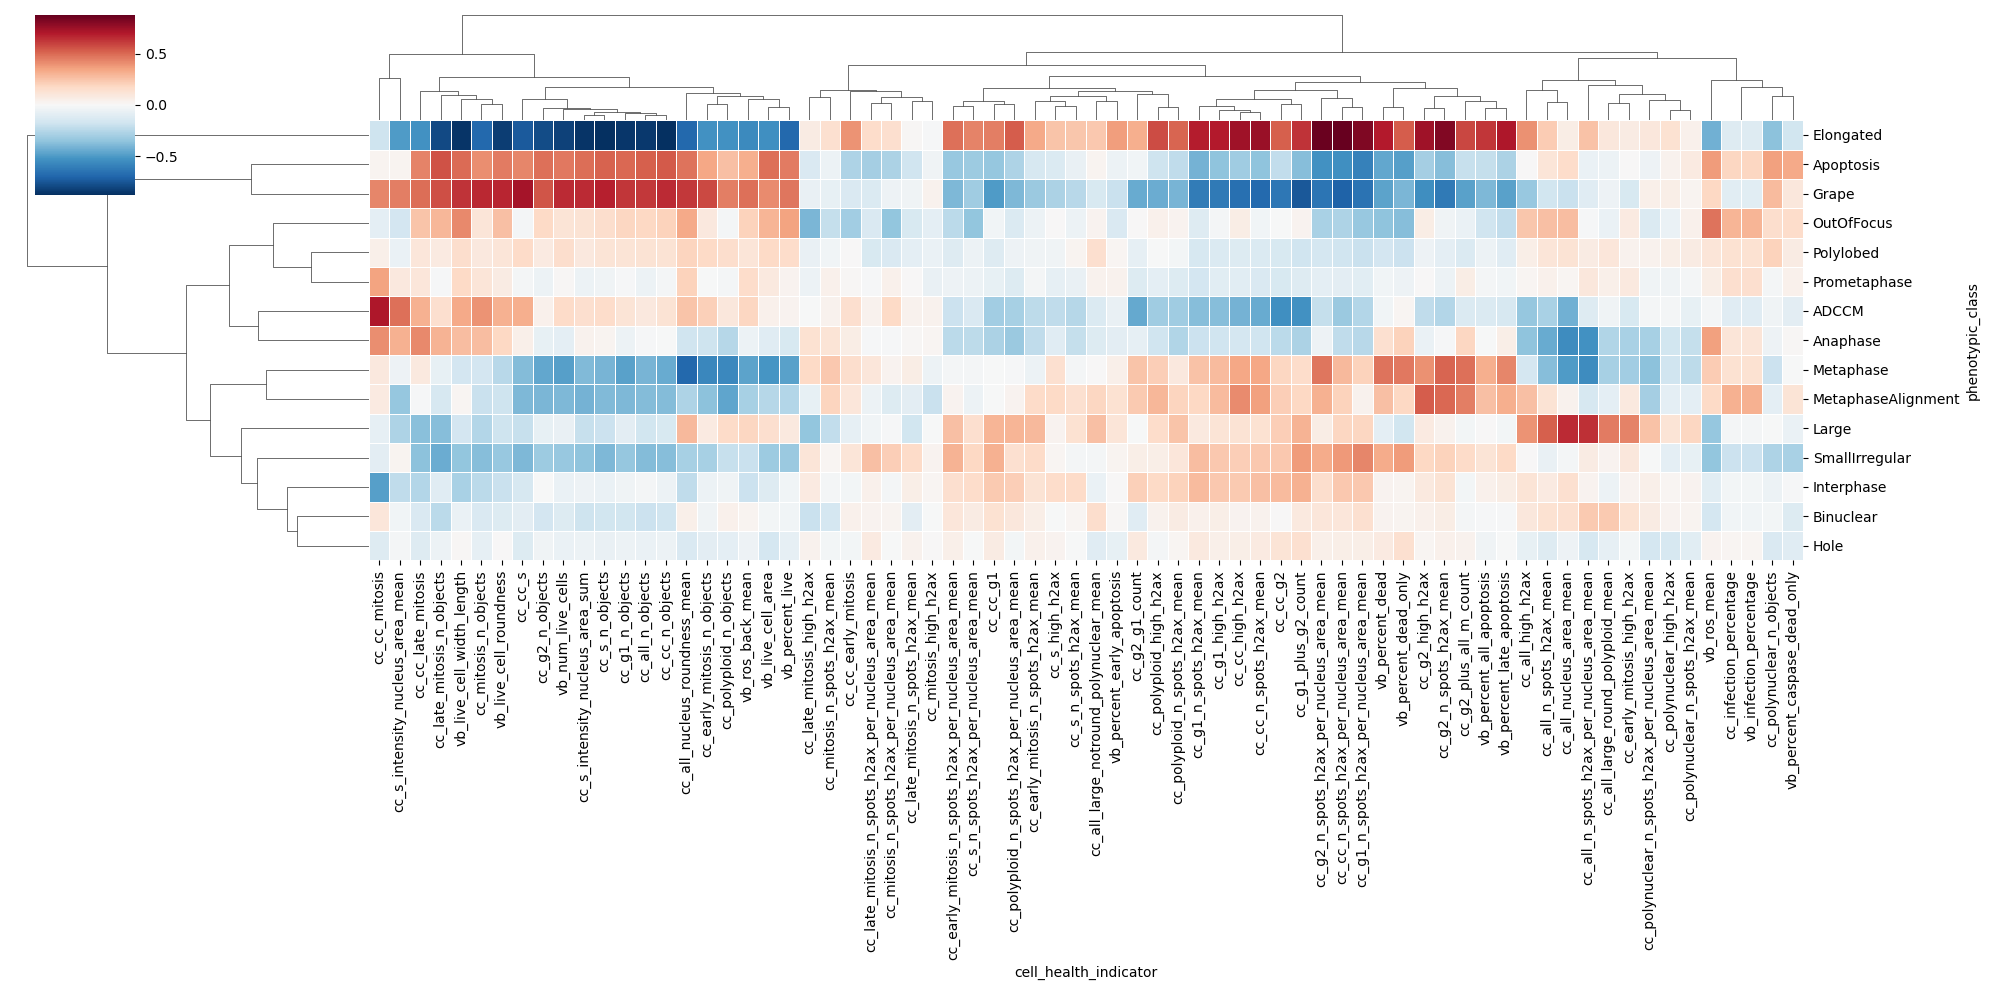

Showing correlation differences for: HCC44, pearson, DP


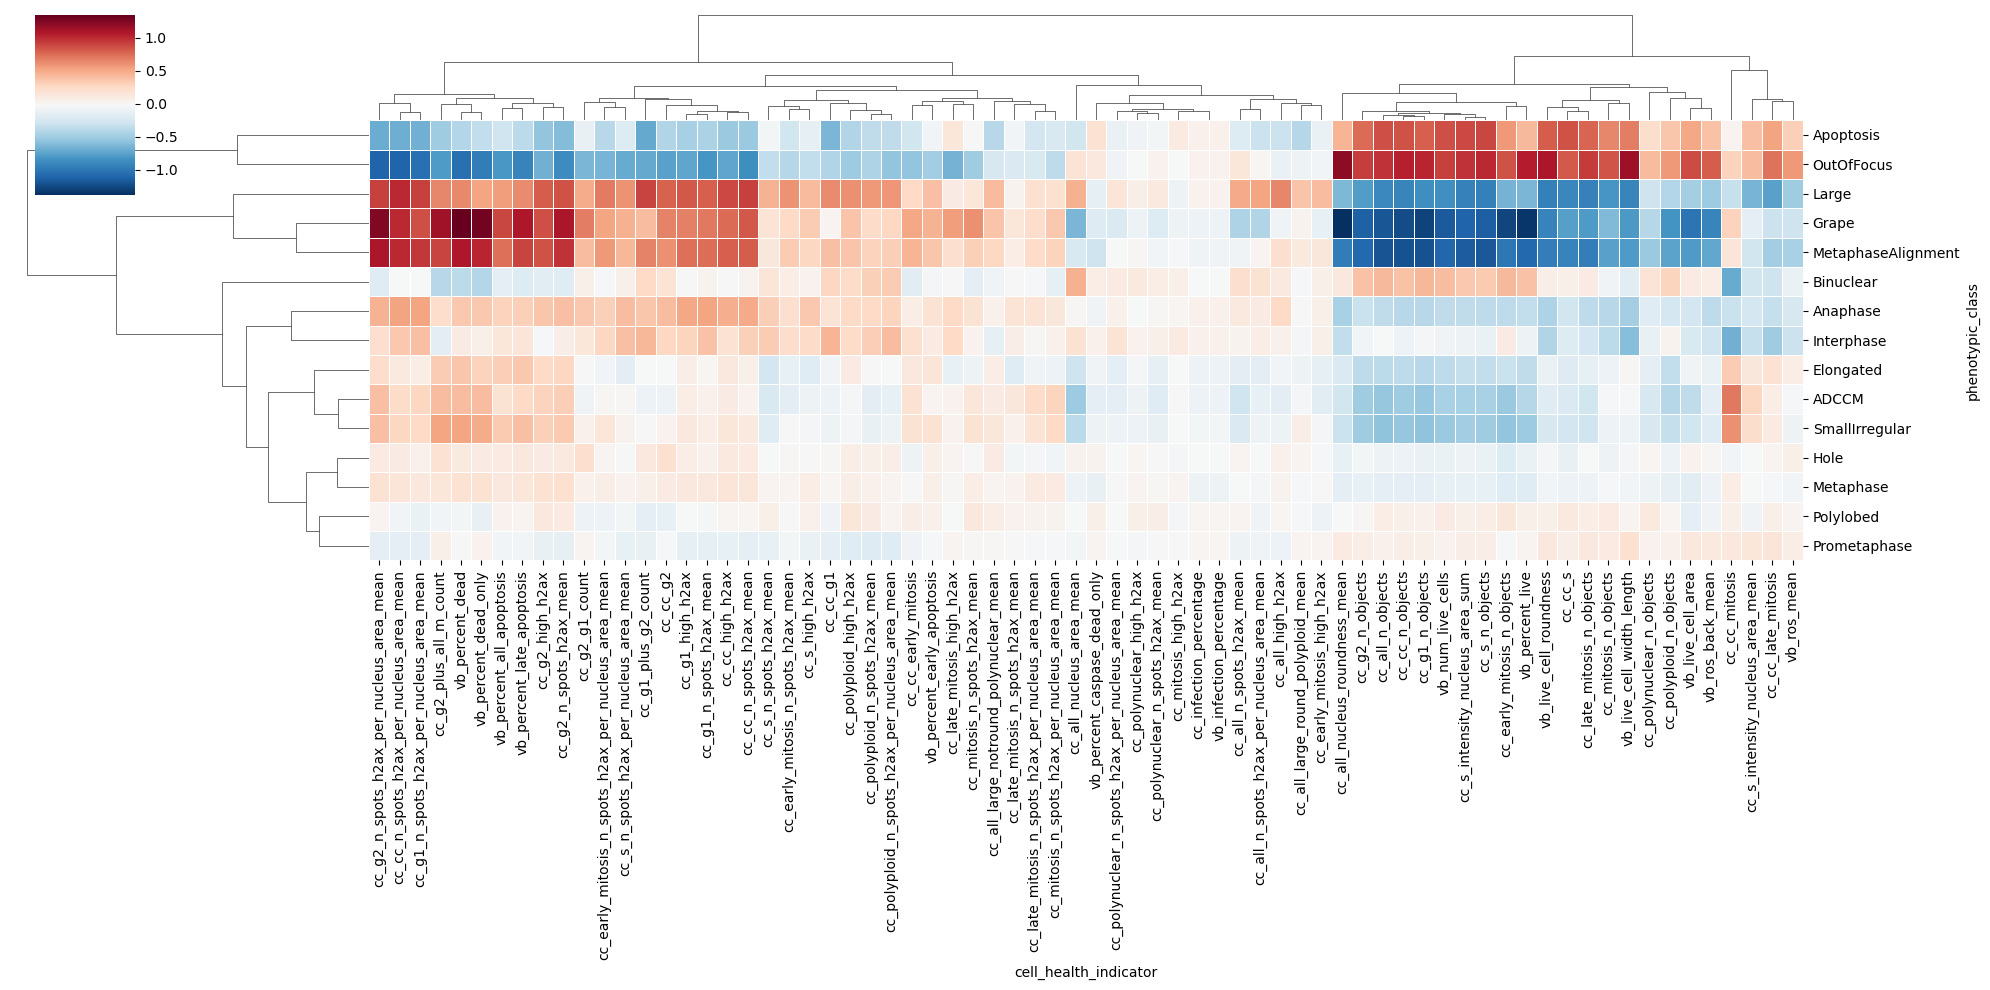

Showing correlation differences for: HCC44, pearson, CP_and_DP


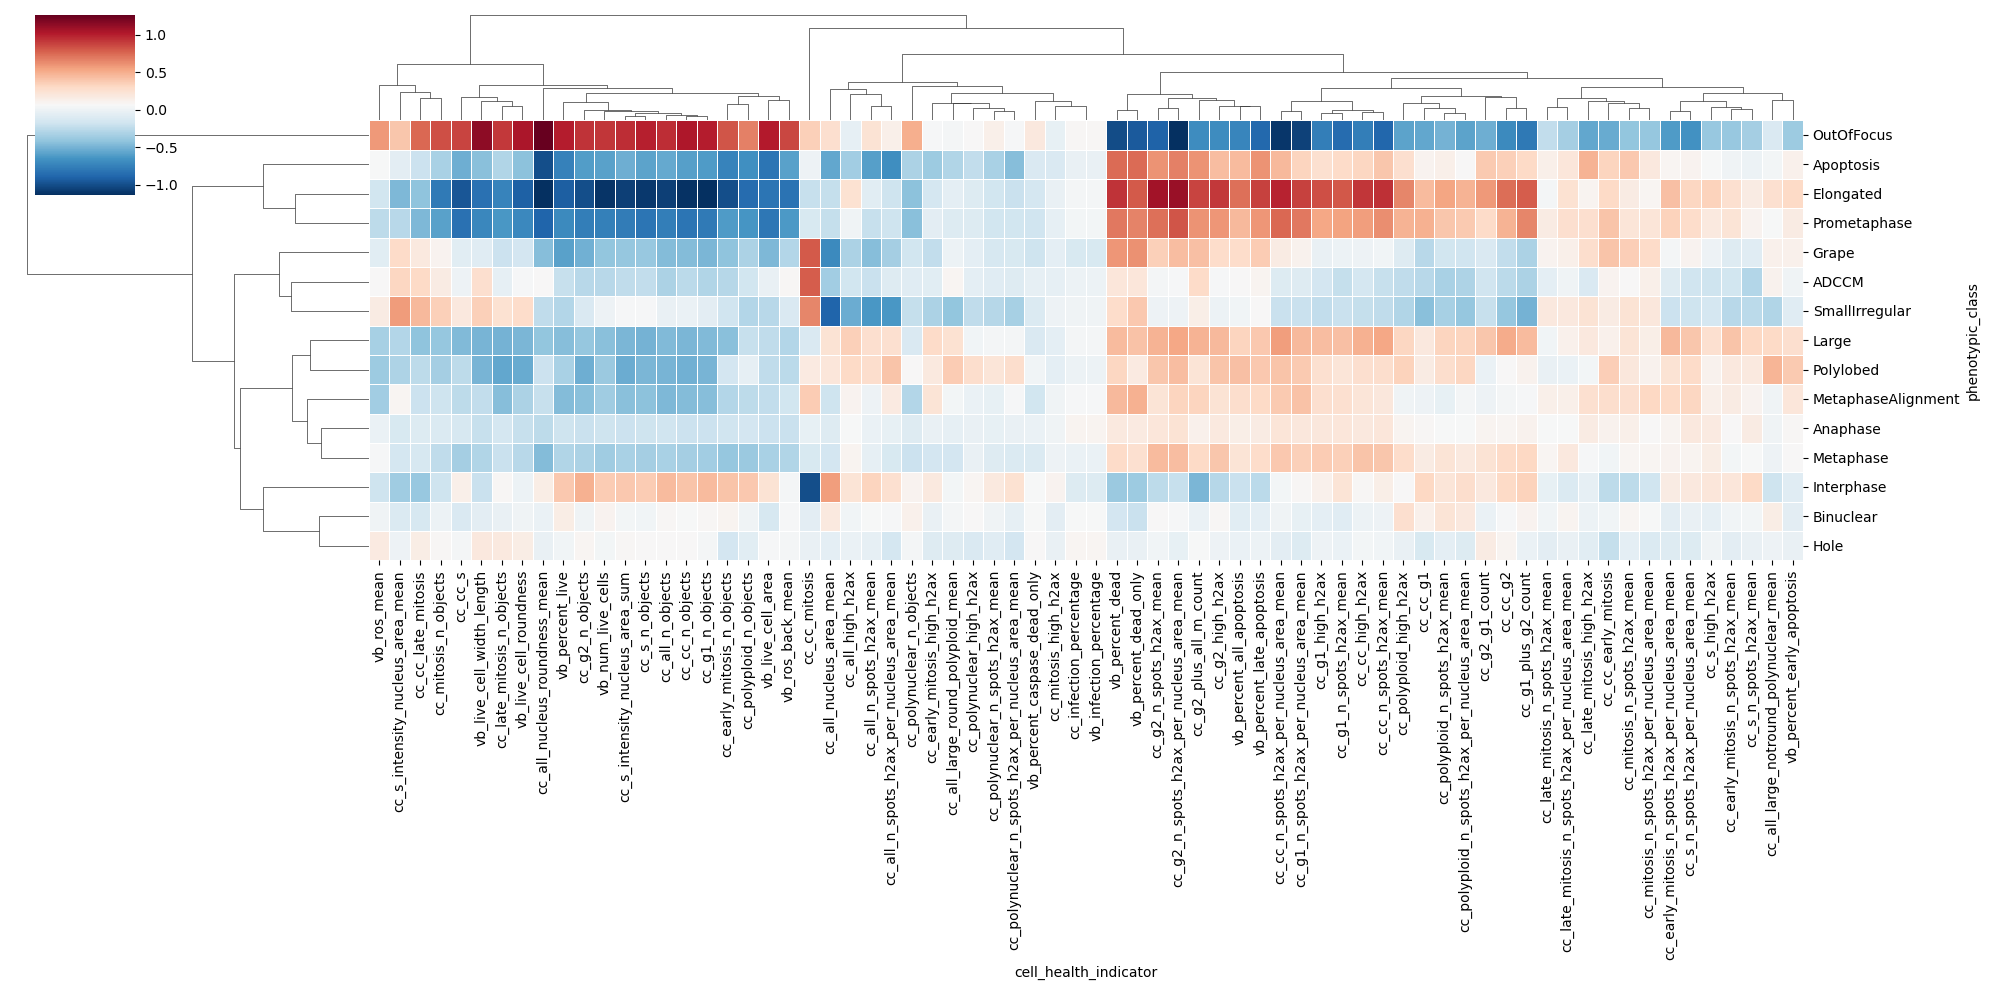

Showing correlation differences for: HCC44, ccc, CP


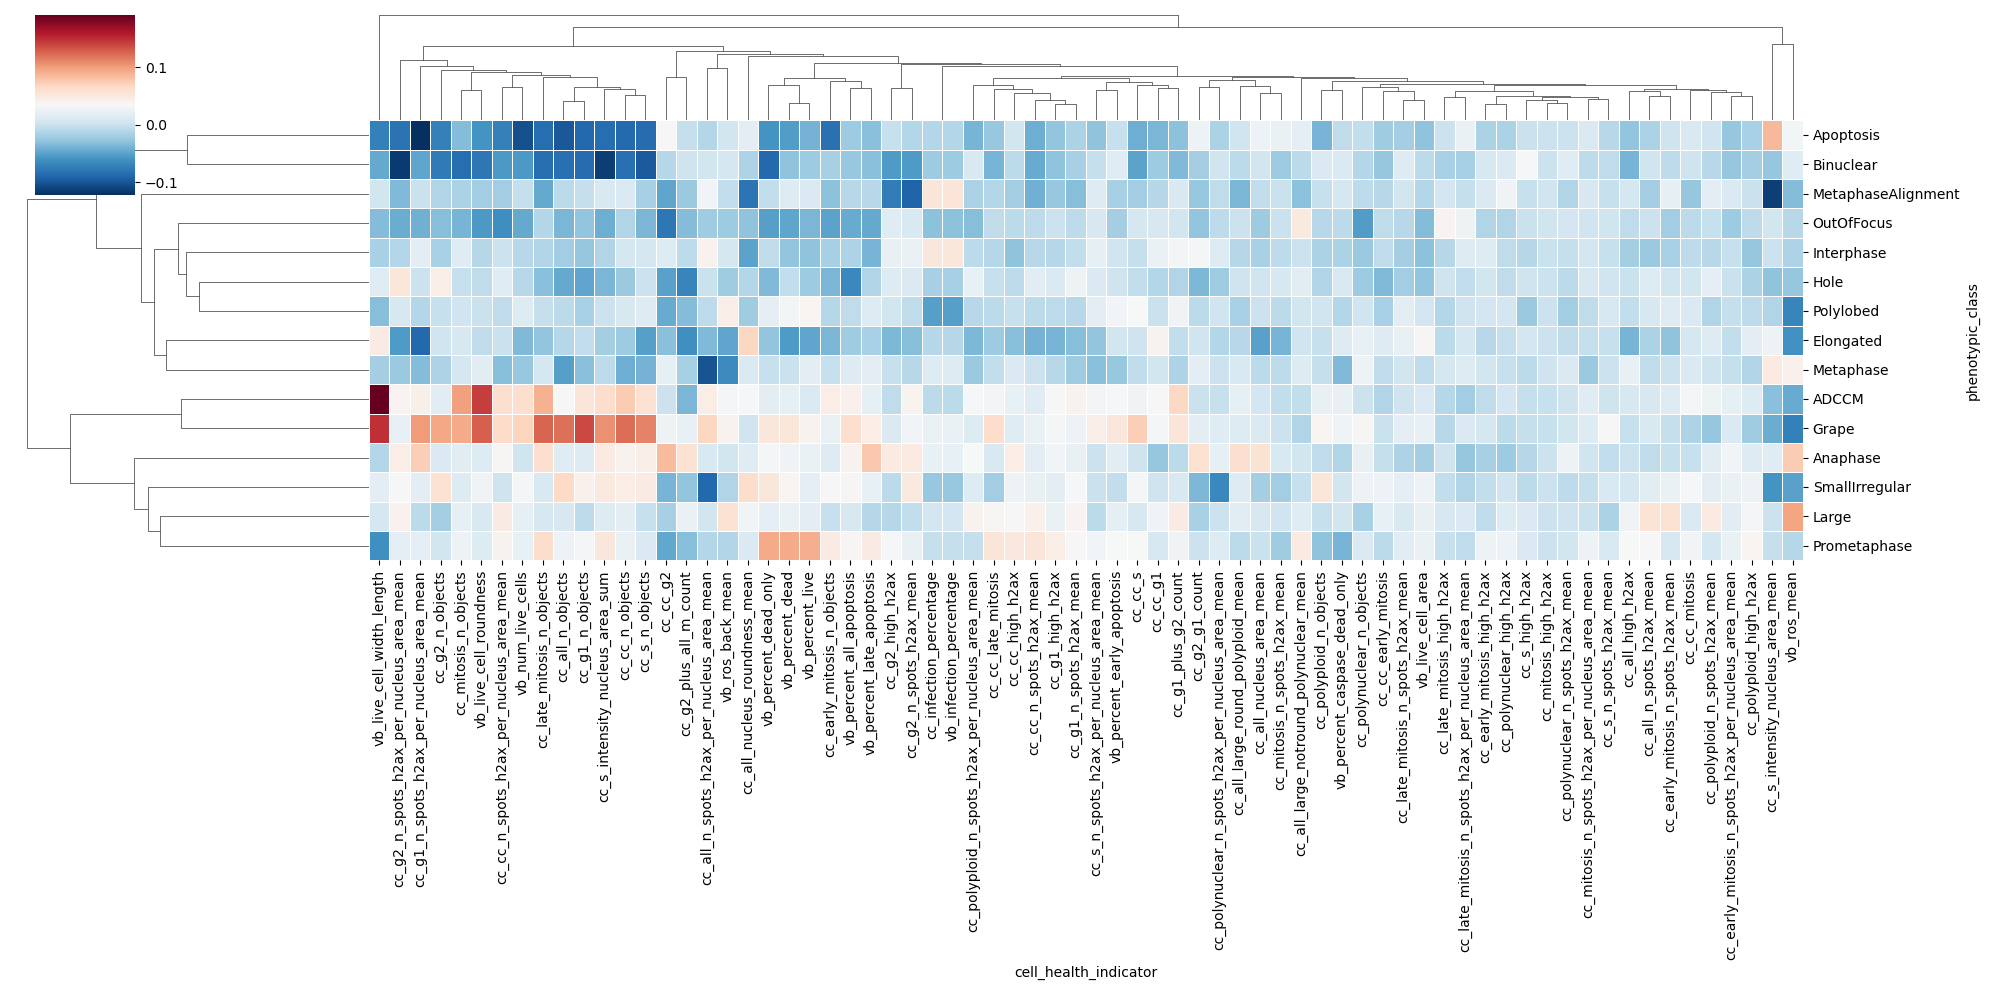

Showing correlation differences for: HCC44, ccc, DP


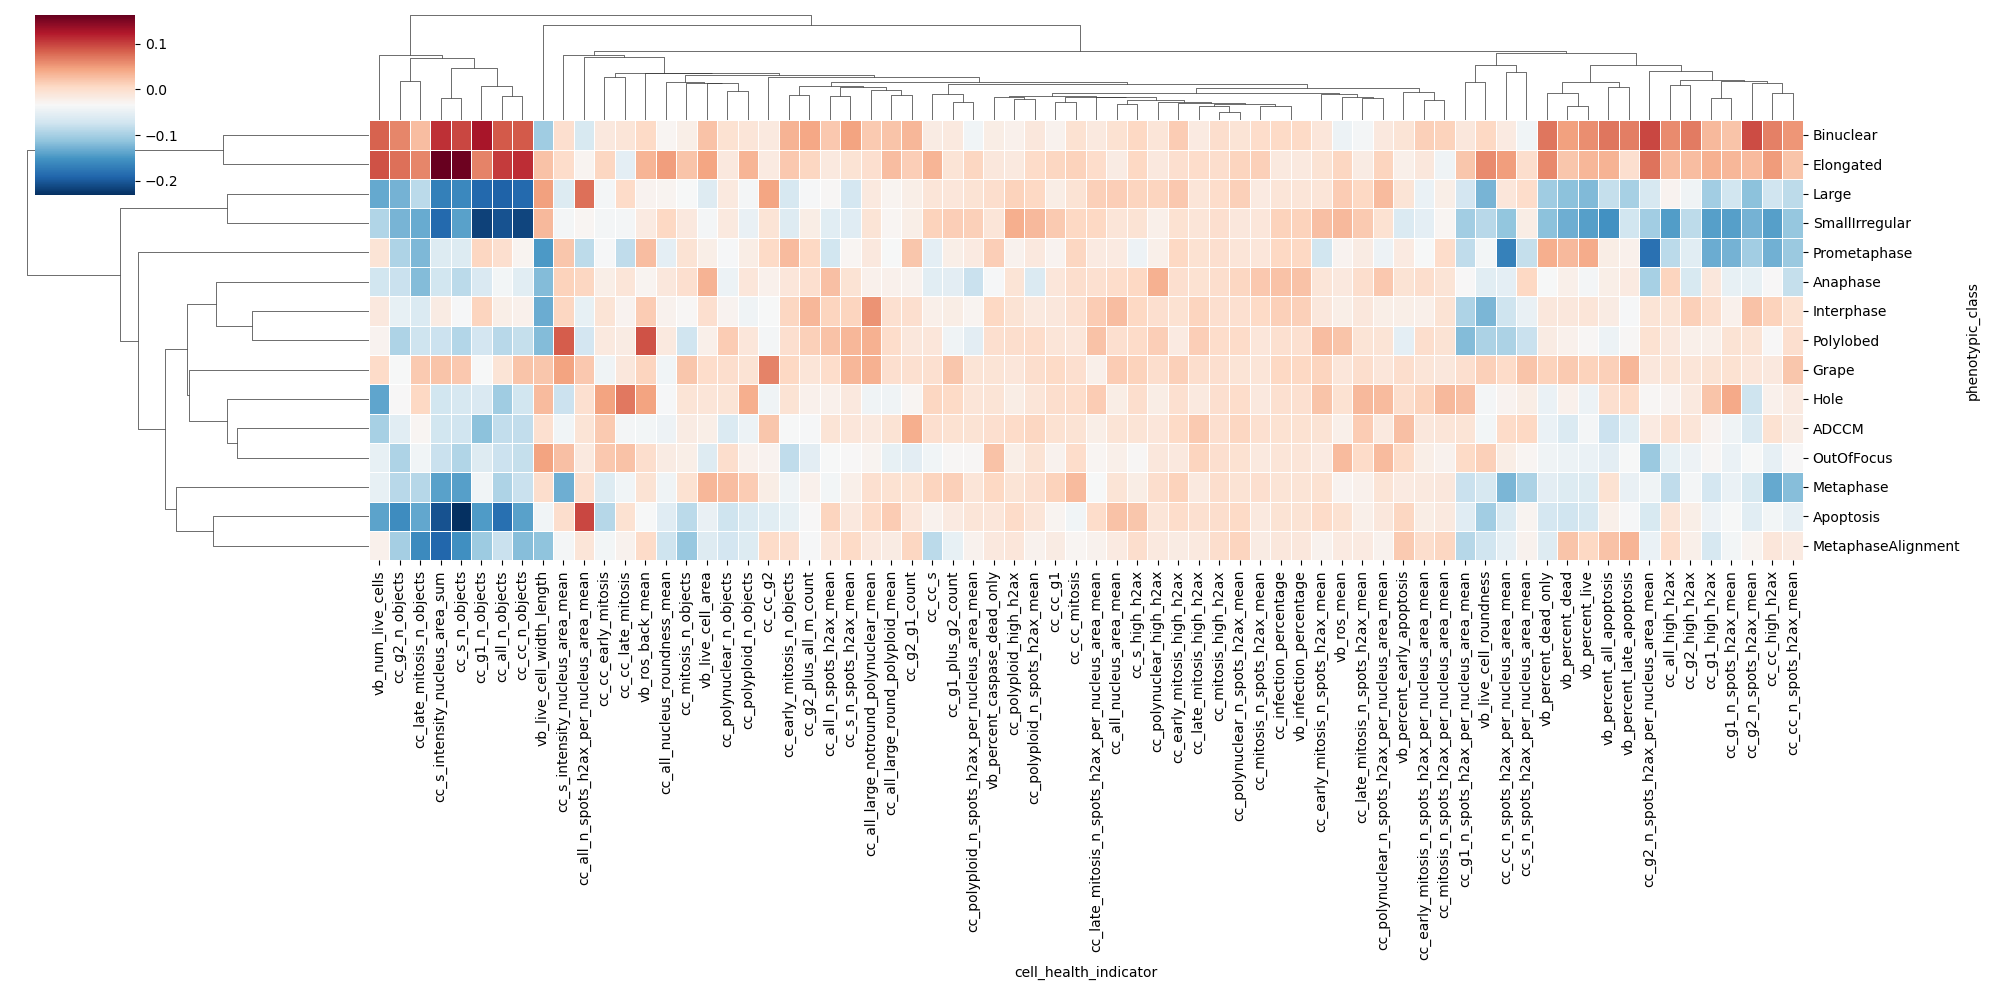

Showing correlation differences for: HCC44, ccc, CP_and_DP


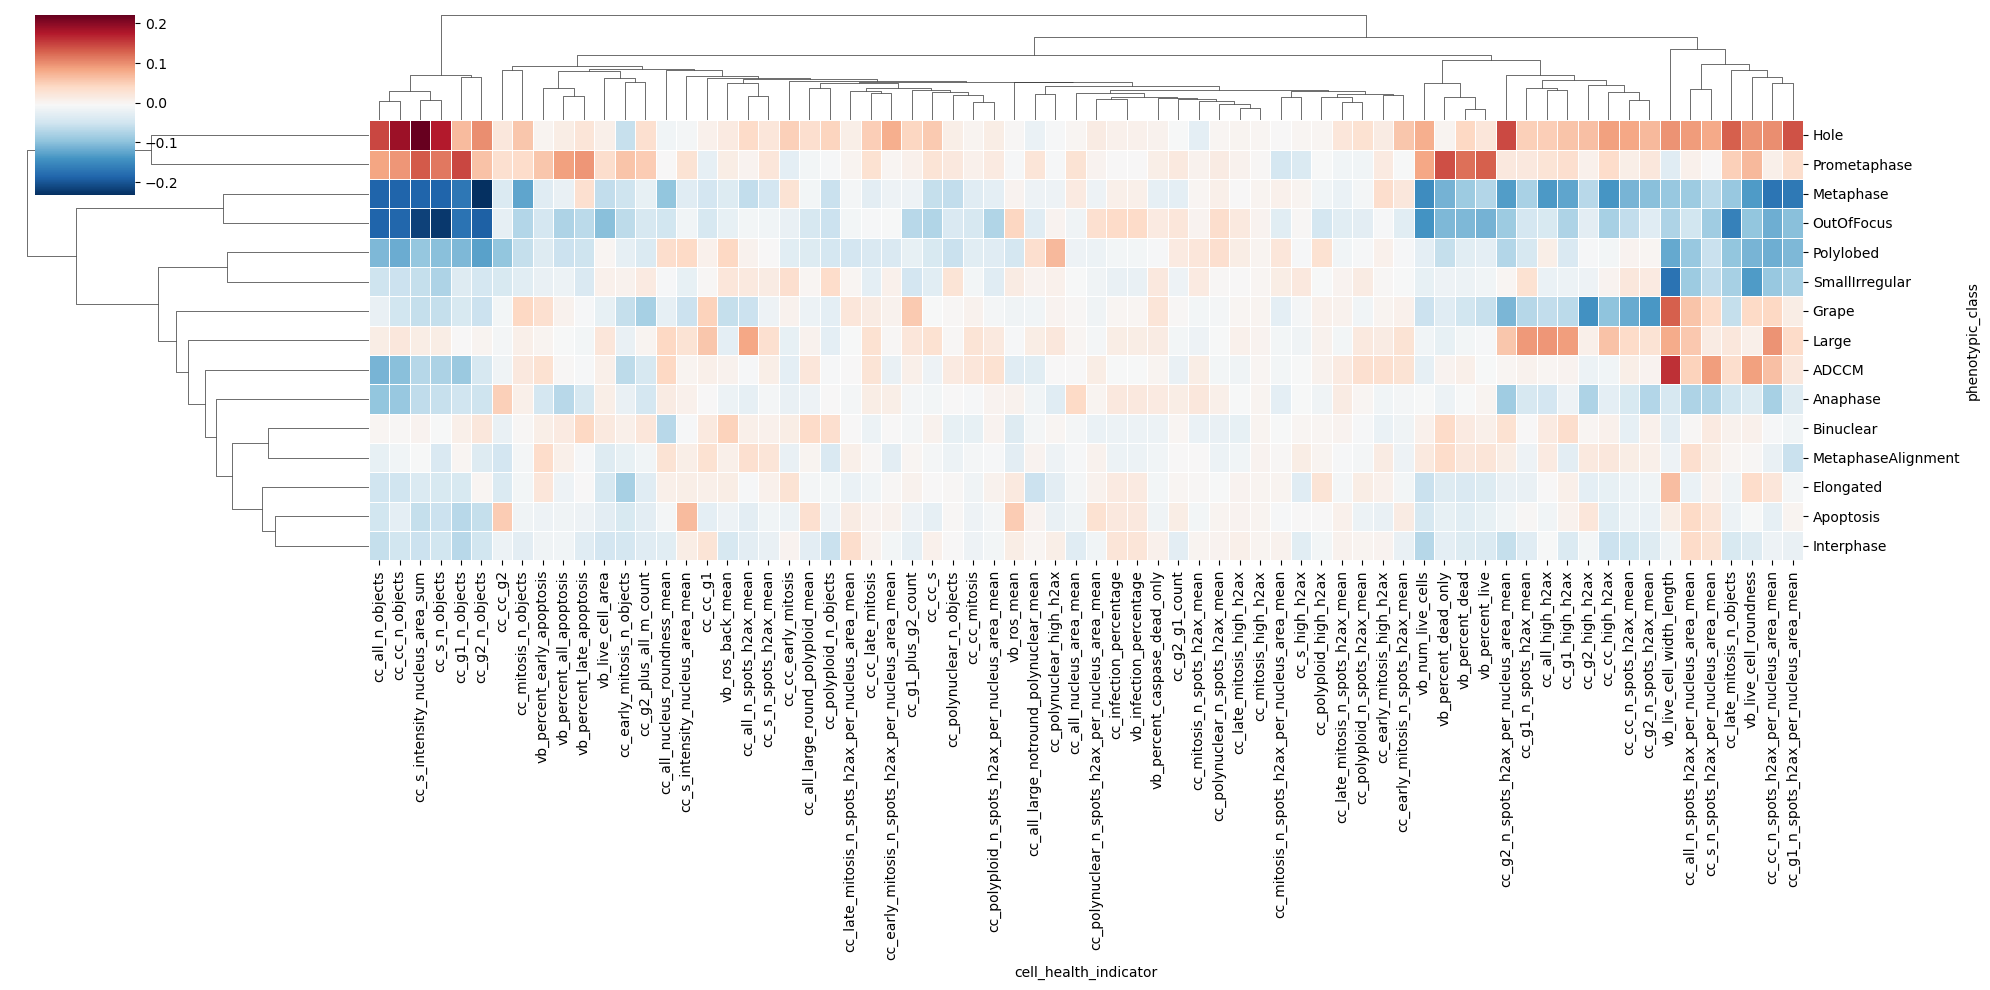

In [3]:
cell_lines = ["all", "A549", "ES2", "HCC44"]
corr_types = ["pearson", "ccc"]
feature_types = ["CP", "DP", "CP_and_DP"]

for cell_line, corr_type, feature_type in itertools.product(
    cell_lines, corr_types, feature_types
):
    print(
        f"Showing correlation differences for: {cell_line}, {corr_type}, {feature_type}"
    )
    
    final_corr_data = tidy_corr_data.loc[
        (tidy_corr_data["cell_line"] == cell_line)
        & (tidy_corr_data["corr_type"] == corr_type)
        & (tidy_corr_data["model_type"] == "final")
        & (tidy_corr_data["feature_type"] == feature_type)
    ]
    
    final_pivoted_corr_data = final_corr_data.pivot(
        "phenotypic_class", "cell_health_indicator", "corr_value"
    )
    
    sb_corr_data = tidy_corr_data.loc[
        (tidy_corr_data["cell_line"] == cell_line)
        & (tidy_corr_data["corr_type"] == corr_type)
        & (tidy_corr_data["model_type"] == "shuffled_baseline")
        & (tidy_corr_data["feature_type"] == feature_type)
    ]
    
    sb_pivoted_corr_data = sb_corr_data.pivot(
        "phenotypic_class", "cell_health_indicator", "corr_value"
    )
    
    diff_pivoted_data = final_pivoted_corr_data - sb_pivoted_corr_data
    
    sns.clustermap(
        diff_pivoted_data,
        xticklabels=diff_pivoted_data.columns,
        yticklabels=diff_pivoted_data.index,
        cmap="RdBu_r",
        linewidth=0.5,
        figsize=(20, 10),
    )
    
    # show the plot in jupyter notebook and close this plot in the background
    plt.show()
    plt.close()